In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import mplhep as hep
hep.style.use([hep.style.ATLAS])

- implement ATLAS selection 
        - done?
- implement own selection on balanced data
    - correct z0 to delta z0 and var3 to sigma_z0=sqrt(var3_1+var3_2)
        - done!
- make plot of two histograms (signal and background as a function of score)
    - done!
- make plot of signal vs background as a function of chosen score cutoff (ATLAS should be (1,1)?)
    - done?
- make selection for electron pairs require energy (momentum)>10GeV
    - done (9GeV for safety)

In [2]:
sample = pd.read_parquet('~/H_Zg/samples_processed/HZeeg_ggF_MC_reduced_Zmodel_eepairs_1Sep_extendedvariables80000_2labels.parquet')
new_study = False

In [3]:
print(sample.shape)
print(sample.columns)

(2336625, 65)
Index(['event_index', 'el_index', 'runNumber', 'eventNumber',
       'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
       'm_ee', 'isZ', 'isZnew', 'el1_pt', 'el1_eta', 'el1_phi', 'el1_m',
       'el1_charge', 'el1_ptvarcone20', 'el1_topoetcone20', 'el1_topoetcone40',
       'el1_f1', 'el1_neflowisol20', 'el1_truthPdgId', 'el1_truthType',
       'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFcommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
       'e

In [4]:
# dz = np.abs(sample['el1_GSFTrack_z0']-sample['el2_GSFTrack_z0'])
dz = (sample['el1_GSFTrack_z0']-sample['el2_GSFTrack_z0'])
sigma_dz = np.sqrt(sample['el1_GSF_Track_Var3']+sample['el2_GSF_Track_Var3'])
sample['dz'] = dz
sample['sigma_dz'] = sigma_dz

no


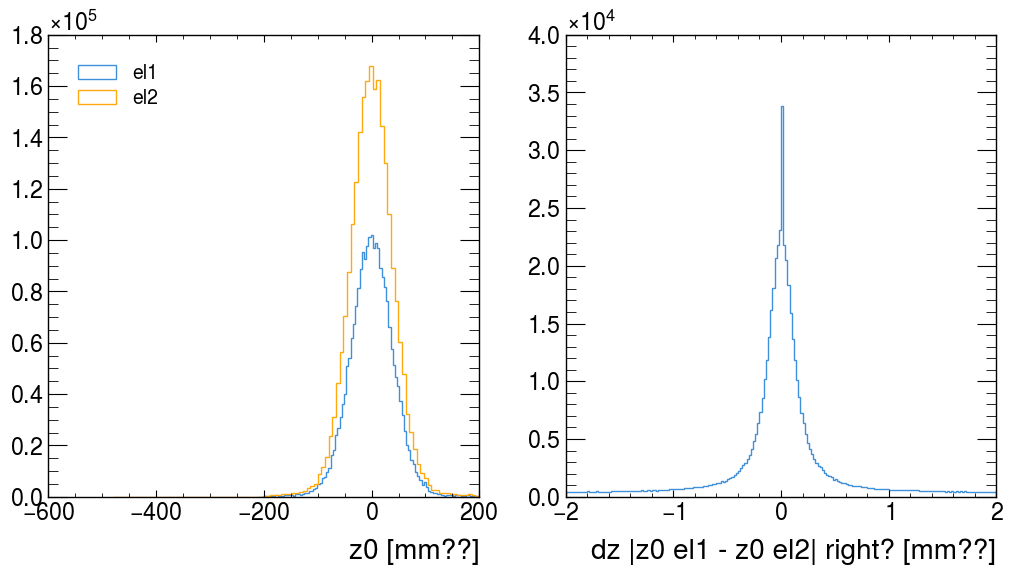

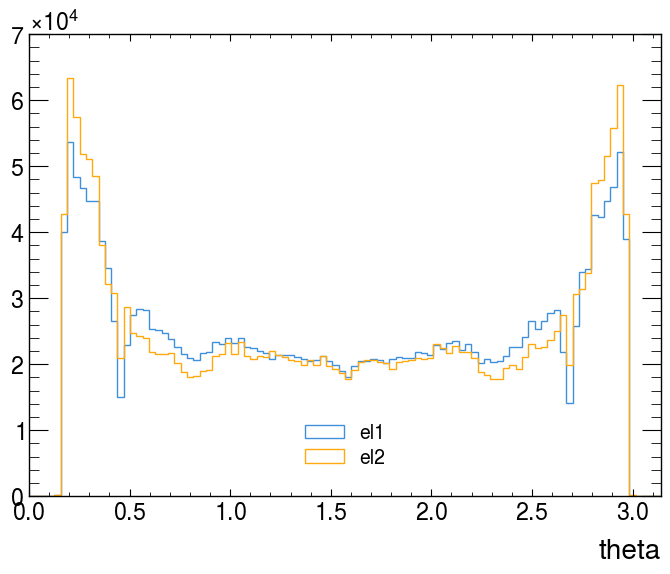

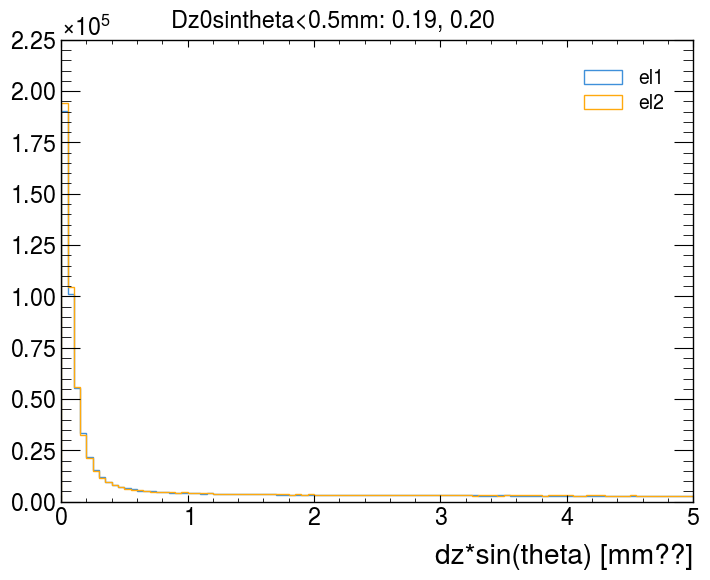

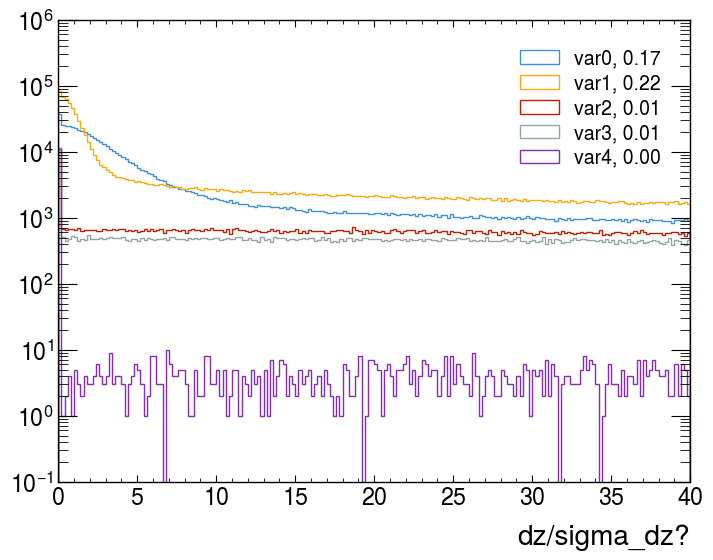

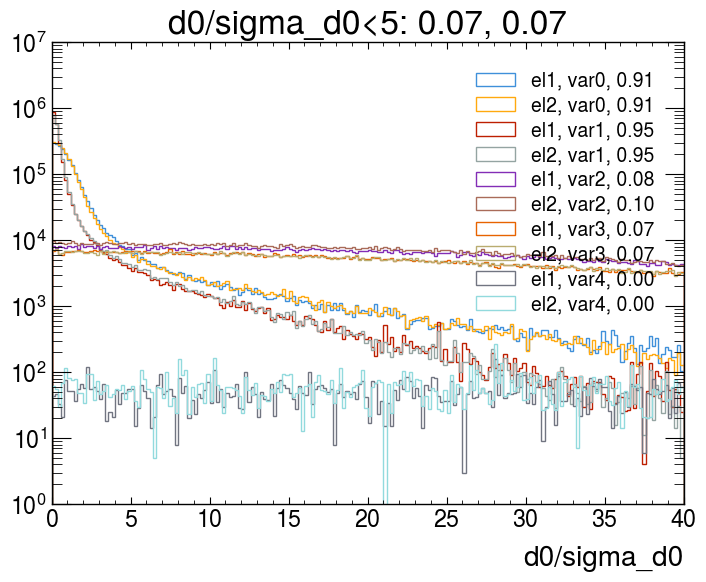

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].hist(sample['el1_GSFTrack_z0'], bins=100, histtype='step', label='el1')
ax[0].hist(sample['el2_GSFTrack_z0'], bins=100, histtype='step', label='el2')
ax[0].legend()
ax[0].set_xlabel('z0 [mm??]')

# fig, ax = plt.subplots()
ax[1].hist(sample['dz'], bins=200, range=(-2,2), histtype='step')
ax[1].set_xlabel('dz |z0 el1 - z0 el2| right? [mm??]')
# ax[1].set_xscale('log')
# fig.suptitle('Dz0sintheta<0.5mm')


fig, ax = plt.subplots()
ax.hist(sample['el1_GSFTrack_theta'], bins=100, histtype='step', label='el1', range=(0, np.pi))
ax.hist(sample['el2_GSFTrack_theta'], bins=100, histtype='step', label='el2', range=(0, np.pi))
ax.set_xlabel('theta')
ax.set_xlim(0, np.pi)
ax.legend()



fig, ax = plt.subplots()
ax.hist(np.abs(sample['dz'])*np.sin(sample['el1_GSFTrack_theta']), range=(0, 10), bins=200, histtype='step', label='el1')
ax.hist(np.abs(sample['dz'])*np.sin(sample['el2_GSFTrack_theta']), range=(0, 10), bins=200, histtype='step', label='el2')
ax.set_xlabel('dz*sin(theta) [mm??]')
fig.suptitle(f'Dz0sintheta<0.5mm: {np.sum(np.abs(sample["dz"])*np.sin(sample["el1_GSFTrack_theta"])<0.5)/sample.shape[0]:.2f}, {np.sum(np.abs(sample["dz"])*np.sin(sample["el2_GSFTrack_theta"])<0.5)/sample.shape[0]:.2f}')
ax.legend()
ax.set_xlim(0, 5)


fig, ax = plt.subplots()
for i in range(5):
    dz = np.abs(sample['el1_GSFTrack_z0'].values- sample['el2_GSFTrack_z0'].values)
    sigma_dz = np.sqrt(sample['el1_GSF_Track_Var' + str(i)].values + sample['el2_GSF_Track_Var' + str(i)].values)
    ax.hist(dz/sigma_dz, bins=200,range=(0,40), histtype='step', label=f'var{i}, {np.sum((dz/sigma_dz)<5)/len(dz):.2f}')
ax.set_xlabel('dz/sigma_dz?')
ax.set_xlim(0, 40)
ax.set_yscale('log')
ax.legend()


fig, ax = plt.subplots()
for i in range(5):
    ax.hist(np.abs(sample['el1_GSFTrack_d0'])/np.sqrt(sample['el1_GSF_Track_Var' + str(i)]), bins=200,range=(0,40), histtype='step', label=f'el1, var{i}, {np.sum(np.abs(sample["el1_GSFTrack_d0"])/np.sqrt(sample["el1_GSF_Track_Var" + str(i)])<5)/sample.shape[0]:.2f}')
    ax.hist(np.abs(sample['el2_GSFTrack_d0'])/np.sqrt(sample['el2_GSF_Track_Var' + str(i)]), bins=200,range=(0,40), histtype='step', label=f'el2, var{i}, {np.sum(np.abs(sample["el2_GSFTrack_d0"])/np.sqrt(sample["el2_GSF_Track_Var" + str(i)])<5)/sample.shape[0]:.2f}')
ax.set_xlabel('d0/sigma_d0')
ax.set_xlim(0, 40)
# ax.set_ylim(0, 8000)
ax.set_yscale('log')
ax.set_title(f'd0/sigma_d0<5: {np.sum(np.abs(sample["el1_GSFTrack_d0"])/np.sqrt(sample["el1_GSF_Track_Var3"])<5)/sample.shape[0]:.2f}, {np.sum(np.abs(sample["el2_GSFTrack_d0"])/np.sqrt(sample["el2_GSF_Track_Var3"])<5)/sample.shape[0]:.2f}')
ax.legend()
print('no')

sum atlas label: 16418
sum atlas label: 14711
var0
percentage below 5 for el1: 0.9050421013213502
percentage below 5 for el2: 0.9076381533194244
var1
percentage below 5 for el1: 0.9529526560744663
percentage below 5 for el2: 0.9514423581019633
var2
percentage below 5 for el1: 0.08430920665489755
percentage below 5 for el2: 0.09622682287487294
var3
percentage below 5 for el1: 0.07133707805060718
percentage below 5 for el2: 0.07071010538704328
var4
percentage below 5 for el1: 0.0005259722890921736
percentage below 5 for el2: 0.0006453752741668004
We assume Var1 is the relavant because of plot, value and because d0 is the second variable in the list after chisqr and ndof
sum atlas label: 14706
percentage below 0.5mm for el1: 0.3264225111004119
percentage below 0.5mm for el2: 0.33220606644198364
sum atlas label: 14565


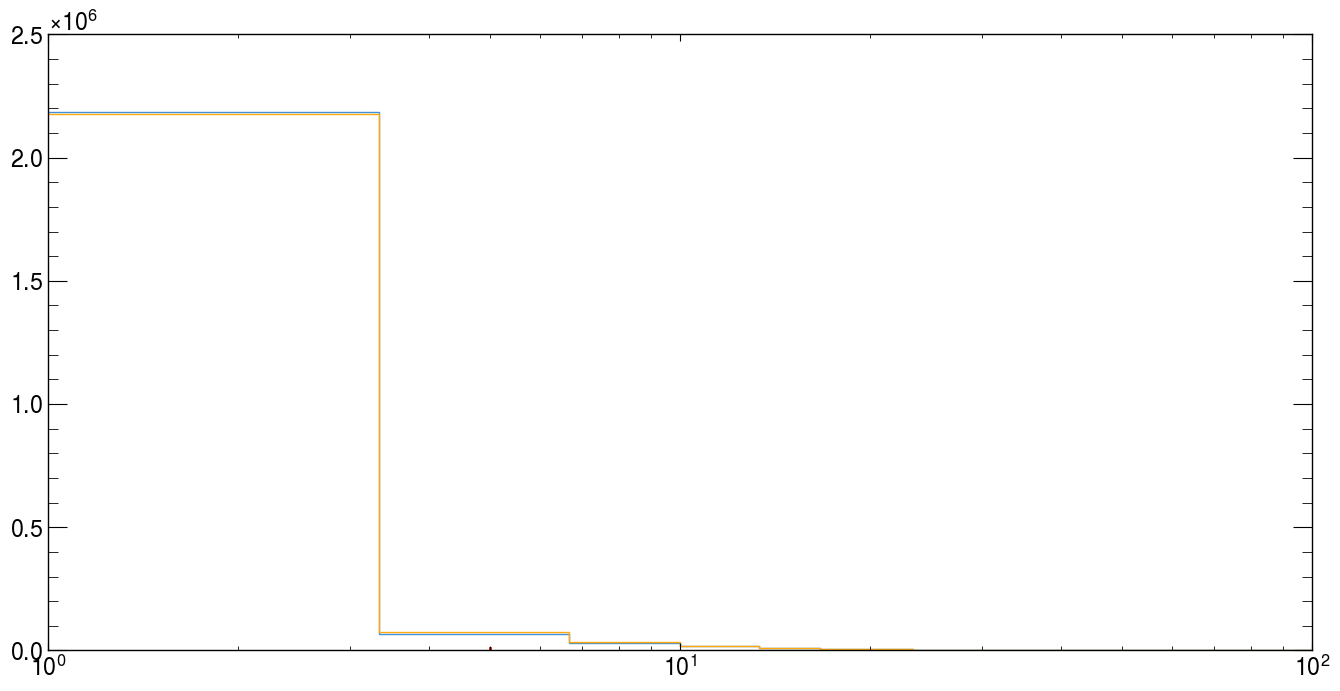

In [6]:
# individual electron requirements:
ATLAS_label = sample['el1_DFcommonElectrons_LHLoose'] & sample['el2_DFcommonElectrons_LHLoose'] \
    & (np.abs(sample['el1_eta']) < 2.47) & (np.abs(sample['el2_eta']) < 2.47) & (sample['el1_pt'] > 10000) \
    & (sample['el2_pt'] > 10000) & (sample['el1_charge'] != sample['el2_charge'])
eta_mask = (np.abs(sample['el1_eta']) < 2.47) & (np.abs(sample['el2_eta']) < 2.47)
Crack_eta = (np.abs(sample['el1_eta']) > 1.37) & (np.abs(sample['el1_eta']) < 1.52) | (np.abs(sample['el2_eta']) > 1.37) & (np.abs(sample['el2_eta']) < 1.52)
print(f'sum atlas label: {np.sum(ATLAS_label)}')
ATLAS_label = ATLAS_label & ~Crack_eta
print(f'sum atlas label: {np.sum(ATLAS_label)}')

for i in range(5):
    print(f'var{i}')
    string = f'el1_GSF_Track_Var{i}'
    string2 = f'el2_GSF_Track_Var{i}'
    d0divsigmad0_1 = np.abs(sample['el1_GSFTrack_d0'])/np.sqrt(sample[string])
    d0divsigmad0_2 = np.abs(sample['el2_GSFTrack_d0'])/np.sqrt(sample[string2])

    print(f'percentage below 5 for el1: {len(d0divsigmad0_1[d0divsigmad0_1<5])/len(d0divsigmad0_1)}')
    print(f'percentage below 5 for el2: {len(d0divsigmad0_2[d0divsigmad0_2<5])/len(d0divsigmad0_2)}')

print(f'We assume Var1 is the relavant because of plot, value and because d0 is the second variable in the list after chisqr and ndof')
d0divsigmad0_1 = np.abs(sample['el1_GSFTrack_d0'])/np.sqrt(sample['el1_GSF_Track_Var1'])
d0divsigmad0_2 = np.abs(sample['el2_GSFTrack_d0'])/np.sqrt(sample['el2_GSF_Track_Var1'])

d0divsigmamask = (d0divsigmad0_1 < 5) & (d0divsigmad0_2 < 5)

ATLAS_label = ATLAS_label & d0divsigmamask
print(f'sum atlas label: {np.sum(ATLAS_label)}')
fig, ax = plt.subplots(figsize=(16,8))
ax.hist(d0divsigmad0_1, bins=30, range=(0,100), histtype='step', label='el1')
ax.hist(d0divsigmad0_2, bins=30, range=(0,100), histtype='step', label='el2')
# ax.set_xlim(0,10)
# ax.set_yscale('log')
ax.set_xscale('log')
ax.plot([5,5], [0,1e4])

# event requirements:
dz0_sintheta1 = (np.abs(sample['dz']*np.sin(sample['el1_GSFTrack_theta'])))
dz0_sintheta2 = (np.abs(sample['dz']*np.sin(sample['el2_GSFTrack_theta'])))

print(f'percentage below 0.5mm for el1: {len(dz0_sintheta1[dz0_sintheta1<5])/len(dz0_sintheta1)}')
print(f'percentage below 0.5mm for el2: {len(dz0_sintheta2[dz0_sintheta2<5])/len(dz0_sintheta2)}')

dz0_sinthetamask = (dz0_sintheta1 < 0.5*np.sqrt(2)) & (dz0_sintheta2 < 0.5*np.sqrt(2)) # sqrt2 from troels magic?

ATLAS_label = ATLAS_label & dz0_sinthetamask
print(f'sum atlas label: {np.sum(ATLAS_label)}')
## append ATLAS_label to sample
sample['ATLAS_label'] = ATLAS_label

sample['Crack_mask'] = ~Crack_eta
sample['eta_mask'] = eta_mask
sample['d0divsigma_d0_mask'] = d0divsigmamask
sample['dz0_sinthetamask'] = dz0_sinthetamask

no


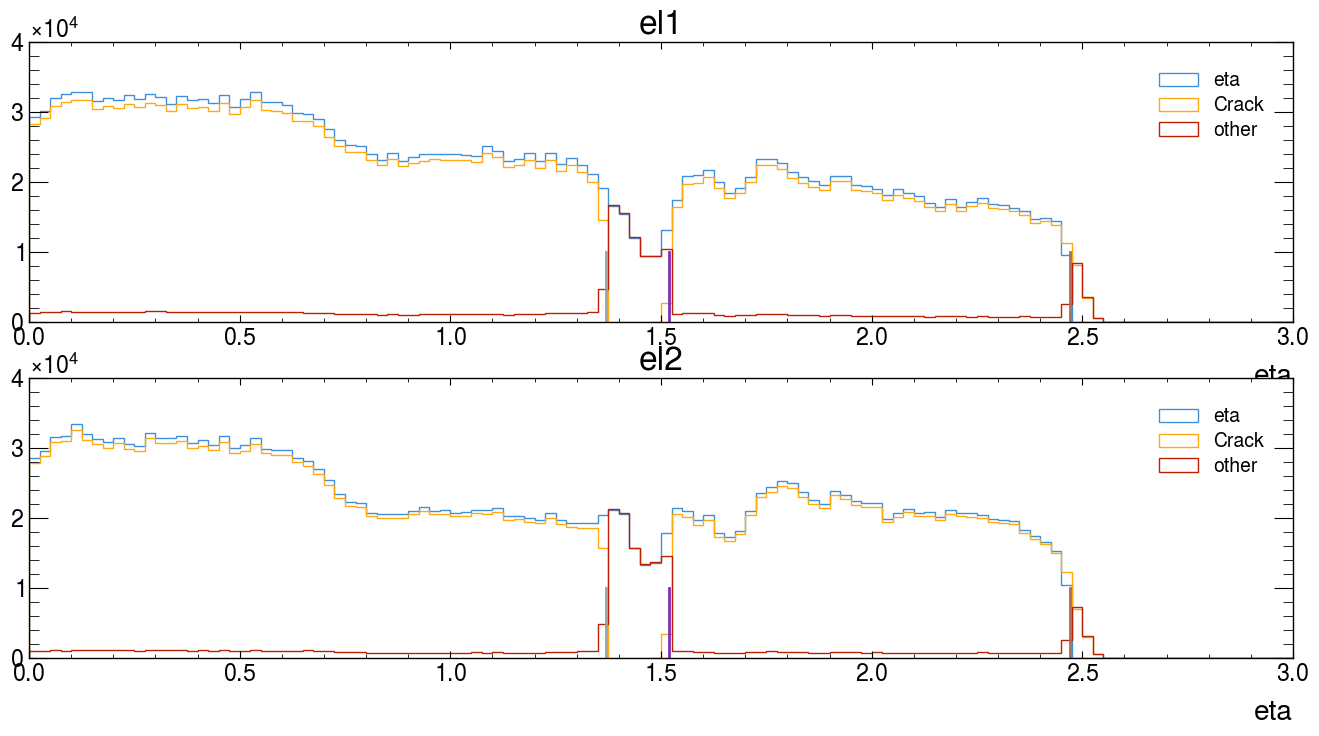

In [7]:
fig, ax = plt.subplots(2,1,figsize=(16,8))
ax[0].hist(np.abs(sample['el1_eta'][eta_mask]), bins=200, range=(0,5), histtype='step', label='eta')
ax[0].hist(np.abs(sample['el1_eta'][~Crack_eta]), bins=200, range=(0,5), histtype='step', label='Crack')
ax[0].hist(np.abs(sample['el1_eta'][~eta_mask | Crack_eta]), range=(0,5), bins=200, histtype='step', label='other')
ax[0].legend()
ax[0].set_xlim(0,3)
ax[0].set_xlabel('eta')
ax[0].set_title('el1')

ax[0].plot([1.37, 1.37], [0, 1e4])
ax[0].plot([1.52, 1.52], [0, 1e4])
ax[0].plot([2.47, 2.47], [0, 1e4])

ax[1].hist(np.abs(sample['el2_eta'][eta_mask]), bins=200, range=(0,5), histtype='step', label='eta')
ax[1].hist(np.abs(sample['el2_eta'][~Crack_eta]), bins=200, range=(0,5), histtype='step', label='Crack')
ax[1].hist(np.abs(sample['el2_eta'][~eta_mask | Crack_eta]), range=(0,5), bins=200, histtype='step', label='other')
ax[1].legend()
ax[1].set_xlim(0,3)
ax[1].set_xlabel('eta')
ax[1].set_title('el2')

ax[1].plot([1.37, 1.37], [0, 1e4])
ax[1].plot([1.52, 1.52], [0, 1e4])
ax[1].plot([2.47, 2.47], [0, 1e4])
print('no')

In [8]:
print(True | False)

True


In [9]:
drop_list = ['isZ', 'isZnew', 'm_ee', 'event_index', 'el_index', 'runNumber', 'eventNumber', 'el1_pt', 'el2_pt'
             , 'el1_truthPdgId', 'el2_truthPdgId', 'el1_truthOrigin', 'el2_truthOrigin', 'el1_truthType', 'el2_truthType',
             'el1_GSFTrack_qOverP', 'el2_GSFTrack_qOverP', 'el1_GSF_Track_Var0', 'el2_GSF_Track_Var0', 'el1_GSF_Track_Var1', 'el2_GSF_Track_Var1',
             'el1_GSF_Track_Var2', 'el2_GSF_Track_Var2', 'el1_GSF_Track_Var4', 'el2_GSF_Track_Var4',
             'el1_GSFTrack_theta', 'el2_GSFTrack_theta', 'el1_GSFTrack_phi', 'el2_GSFTrack_phi', 'el1_phi', 'el2_phi'
             , 'el1_DFcommonElectrons_LHLoose', 'el2_DFcommonElectrons_LHLoose',
             'el1_GSFTrack_z0', 'el2_GSFTrack_z0', 'el1_GSF_Track_Var3', 'el2_GSF_Track_Var3', 'ATLAS_label', 'el1_GSF_dR', 'el2_GSF_dR',
             'el1_GSFTrack_d0', 'el1_GSFTrack_d0', 'Crack_mask', 'eta_mask', 'd0divsigma_d0_mask', 'dz0_sinthetamask']

In [10]:
mask_GEV = (sample['el1_pt'] > 9000) & (sample['el2_pt'] > 9000)
# ATLAS_label = ATLAS_label[mask_GEV]
sample_masked = sample[mask_GEV]

In [11]:
isZ = sample_masked[sample_masked['isZnew'] == 1]
isNotZ = sample_masked[sample_masked['isZnew'] == 0]
isNotZ_sampled = isNotZ.sample(frac=0.2, random_state=42) 
small_sample = pd.concat([isZ, isNotZ_sampled])

print(f'full sample size:{len(sample_masked)}, number of Z:{len(isZ)}, number of not Z:{len(isNotZ)}')
print(f'small sample size:{len(small_sample)}, number of Z:{len(isZ)}, number of not Z:{len(isNotZ_sampled)}')


full sample size:111542, number of Z:17746, number of not Z:93796
small sample size:36505, number of Z:17746, number of not Z:18759


no


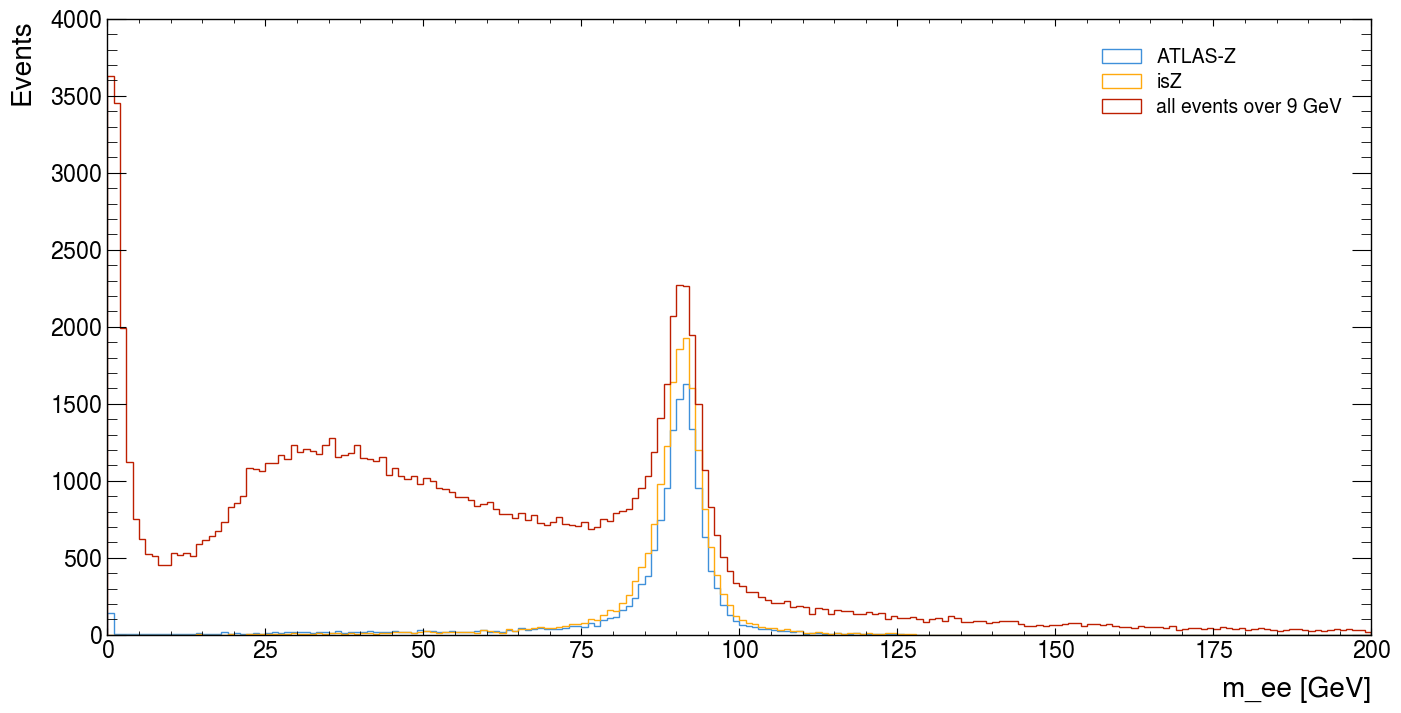

In [12]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(sample_masked['m_ee'][ATLAS_label==1], bins=200, range=(0, 200), histtype='step', label='ATLAS-Z')
ax.hist(sample_masked['m_ee'][sample_masked['isZnew']==1], bins=200, range=(0, 200), histtype='step', label='isZ')
ax.hist(sample_masked['m_ee'], bins=200, range=(0, 200), histtype='step', label='all events over 9 GeV')
ax.set_xlabel('m_ee [GeV]')
ax.set_ylabel('Events')
ax.legend()
# ax.set_title('ATLAS label')
print('no')

In [13]:
input_data = small_sample
truth_data = small_sample['isZnew']

In [14]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

r = np.random
r.seed(12)

X_train, X_test, y_train, y_test = train_test_split(input_data, truth_data, test_size=0.25, random_state=12)
X_train = X_train.drop(columns=drop_list)
full_val_data = X_test
full_val_label = y_test
X_test = X_test.drop(columns=drop_list)
print(f'total number of pairs in training sample: {len(X_train)}, true Z pairs: {len(X_train[y_train==1])}, true not Z pairs: {len(X_train[y_train==0])}')
print(f'total number of pairs in testing sample: {len(X_test)}, true Z pairs: {len(X_test[y_test==1])}, true not Z pairs: {len(X_test[y_test==0])}')


/lustre/hpc/hep/kinch/python/initenv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


total number of pairs in training sample: 27378, true Z pairs: 13302, true not Z pairs: 14076
total number of pairs in testing sample: 9127, true Z pairs: 4444, true not Z pairs: 4683


In [15]:
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 0, 100),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1,log=True),
        'drop_rate': trial.suggest_float('drop_rate', 0.005, 0.4),
        'verbose': 0
    }

    dtrain = lgb.Dataset(X_train, label=y_train)
    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(X_test)
    auc = roc_auc_score(y_test, preds)
    return auc

if new_study==True:
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=100)

    print('Number of finished trials:', len(study.trials))
    print('Best trial:', study.best_trial.params)

In [16]:
if new_study==True:
    print('Best value:', study.best_value)
    print('Best parameters:', study.best_params)

In [17]:
if new_study==True:
    model = lgb.LGBMClassifier(**study.best_params)
    model.fit(X_train, y_train)
else:
    old_fit = {'max_depth': 41, 'num_leaves': 66, 'learning_rate': 0.09828757745291533, 'drop_rate': 0.21809508884188278}
    model = lgb.LGBMClassifier(**old_fit)
    model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 13302, number of negative: 14076
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4987
[LightGBM] [Info] Number of data points in the train set: 27378, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485865 -> initscore=-0.056557
[LightGBM] [Info] Start training from score -0.056557


Text(0.5, 1.0, 'Receiver operating characteristic')

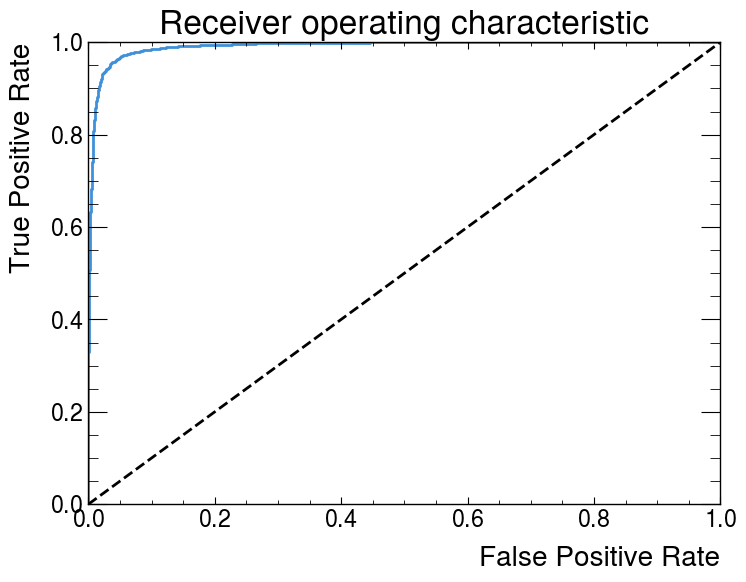

In [18]:
# roc curve

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:0.2e})')
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Luck')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

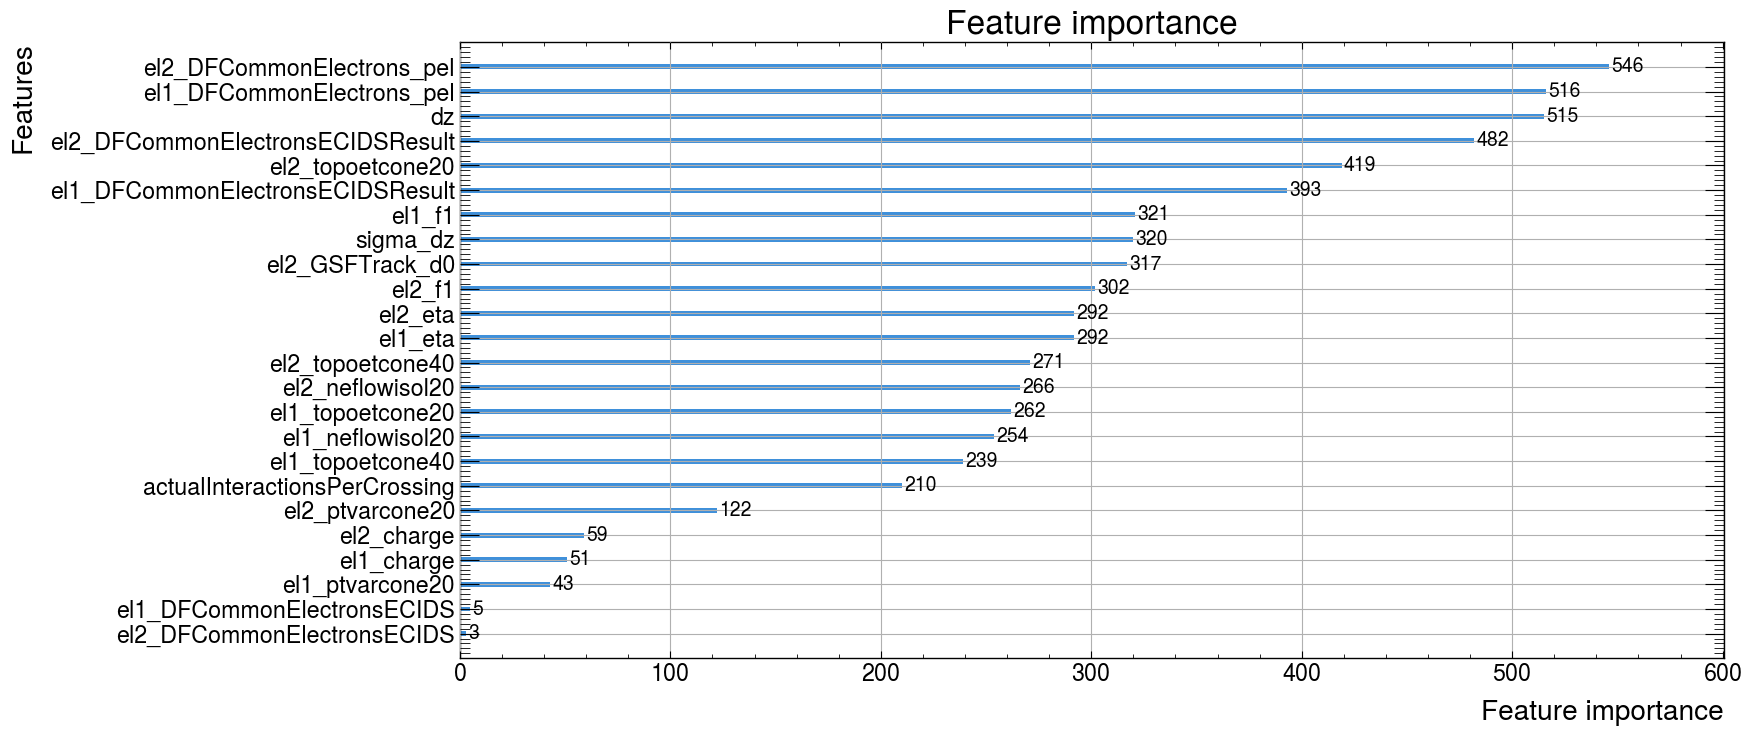

In [19]:
# feature importance
fig, ax = plt.subplots(figsize=(16, 8))
lgb.plot_importance(model, ax=ax)

In [20]:
scores = model.predict_proba(X_test)[:,1]
model_prediction = model.predict(X_test)

no


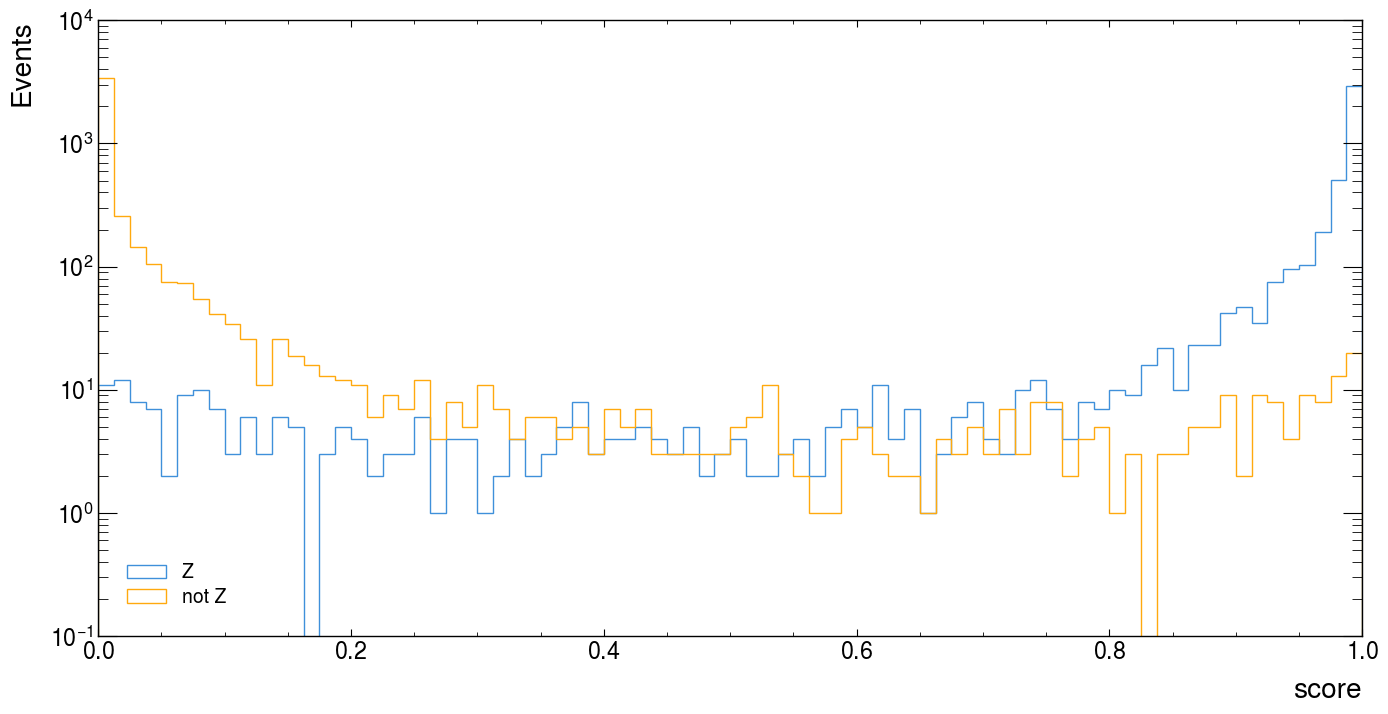

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(scores[full_val_label==1], bins=80, range=(0, 1), histtype='step', label='Z')
ax.hist(scores[full_val_label==0], bins=80, range=(0, 1), histtype='step', label='not Z')
ax.set_xlabel('score')
ax.set_ylabel('Events')
ax.set_yscale('log')
ax.legend()

print('no')

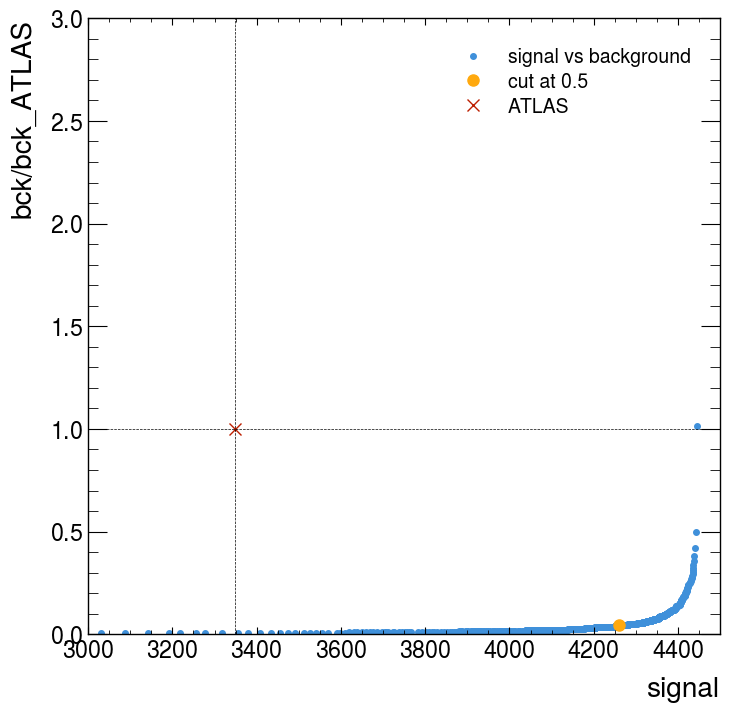

In [22]:
N = 10000
p = np.linspace(0, 1-1/N, 1000-1)
eff = []
sig = []
bck = []
bck_atlas = []


sigp = 0
for i in p:
    if i>=0.5 and sigp == 0:
        sigp = len(scores[(scores > i) & (full_val_label == 1)])
        bckp = len(scores[(scores > i) & (full_val_label == 0)])
    sig.append(len(scores[(scores > i) & (full_val_label == 1)]))
    bck.append(len(scores[(scores > i) & (full_val_label == 0)]))
    bck_atlas.append(len(scores[(scores > i) & (full_val_data['ATLAS_label'] == 0)]))
    # if len(scores[(scores > i) & (full_val_label == 0)]) == 0:
    #     break
    # else:
    #     signaltobck = len(scores[(scores > i) & (full_val_label == 1)]) / len(scores[(scores > i) & (full_val_label == 0)])
    # eff.append(signaltobck)


atlassig = len(full_val_data[(full_val_data['ATLAS_label'] == 1) & (full_val_label == 1)])
atlasbck = len(full_val_data[(full_val_data['ATLAS_label'] == 0) & (full_val_label == 0)])



fig, ax = plt.subplots(figsize=(8, 8))
background = np.array(bck)
ax.plot(np.array(sig),np.array(background)/atlasbck,'.', label = 'signal vs background')
ax.plot(sigp,bckp/atlasbck,'o', label = 'cut at 0.5')
ax.plot(atlassig,atlasbck/atlasbck,'x', label = 'ATLAS')
ax.axvline(x=atlassig, color='k', linestyle='--', linewidth=0.5)
ax.axhline(y=1, color='k', linestyle='--', linewidth=0.5)
ax.set_xlim(3000, 4500)
ax.set_ylim(0, 3)
ax.set_xlabel('signal')
ax.set_ylabel('bck/bck_ATLAS')
ax.legend()

In [23]:
print(sig)
print(atlassig)

[4444, 4442, 4441, 4438, 4438, 4436, 4436, 4436, 4435, 4435, 4434, 4433, 4433, 4431, 4430, 4429, 4428, 4426, 4424, 4424, 4423, 4423, 4421, 4421, 4421, 4421, 4421, 4420, 4420, 4420, 4417, 4417, 4417, 4417, 4417, 4417, 4414, 4414, 4413, 4413, 4412, 4411, 4410, 4410, 4410, 4410, 4409, 4408, 4407, 4406, 4406, 4406, 4406, 4406, 4406, 4405, 4405, 4405, 4405, 4404, 4404, 4404, 4404, 4404, 4402, 4400, 4400, 4398, 4396, 4396, 4396, 4396, 4396, 4396, 4396, 4395, 4394, 4394, 4394, 4393, 4393, 4393, 4390, 4390, 4390, 4389, 4388, 4385, 4385, 4385, 4385, 4384, 4383, 4382, 4382, 4382, 4382, 4381, 4381, 4379, 4378, 4378, 4378, 4377, 4377, 4377, 4377, 4377, 4376, 4376, 4376, 4375, 4375, 4373, 4373, 4373, 4373, 4372, 4372, 4371, 4371, 4371, 4371, 4369, 4369, 4369, 4369, 4369, 4368, 4368, 4368, 4368, 4368, 4368, 4367, 4367, 4367, 4366, 4366, 4366, 4366, 4366, 4365, 4365, 4365, 4365, 4364, 4362, 4360, 4360, 4359, 4358, 4358, 4358, 4358, 4356, 4356, 4356, 4356, 4356, 4356, 4356, 4355, 4355, 4355, 4355, 435

no


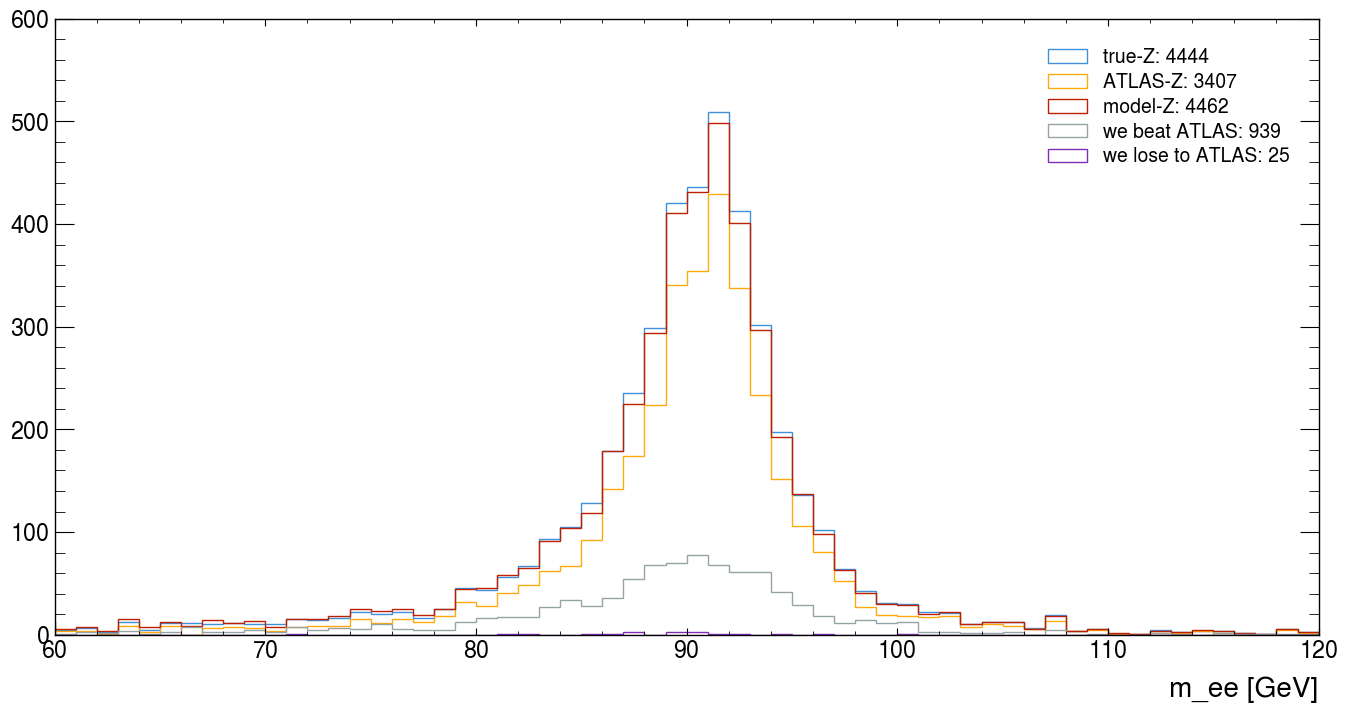

In [24]:
mask_we_win = (full_val_data['ATLAS_label'] == 0) & (model_prediction == 1) & (full_val_label == 1)
mask_we_lose = (full_val_data['ATLAS_label'] == 1) & (model_prediction == 0) & (full_val_label == 1)

fig, ax = plt.subplots(figsize=(16, 8))
counts_truth = ax.hist(full_val_data['m_ee'][full_val_label==1], bins=200, range=(0, 200), histtype='step', label=f"true-Z: {len(full_val_data['m_ee'][full_val_label==1])}")
# ax.hist(small_sample['m_ee'][truth_data==0], bins=200, range=(0, 200), histtype='step', label='non-Z')
counts_atlas = ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z: {len(full_val_data['m_ee'][full_val_data['ATLAS_label']==1])}")
counts_model = ax.hist(full_val_data['m_ee'][model_prediction==1], bins=200, range=(0, 200), histtype='step', label=f"model-Z: {len(full_val_data['m_ee'][model_prediction==1])}")
counts_we_win = ax.hist(full_val_data['m_ee'][mask_we_win], bins=200, range=(0, 200), histtype='step', label=f"we beat ATLAS: {len(full_val_data['m_ee'][mask_we_win])}")
counts_we_lose = ax.hist(full_val_data['m_ee'][mask_we_lose], bins=200, range=(0, 200), histtype='step', label=f"we lose to ATLAS: {len(full_val_data['m_ee'][mask_we_lose])}")
# ax.hist(small_sample['m_ee'], bins=200, range=(0, 200), histtype='step', label='all events')
ax.set_xlabel('m_ee [GeV]')
ax.legend()
ax.set_xlim(60, 120)
# ax.set_yscale('log')
print('no')

[[4483  200]
 [ 182 4262]]


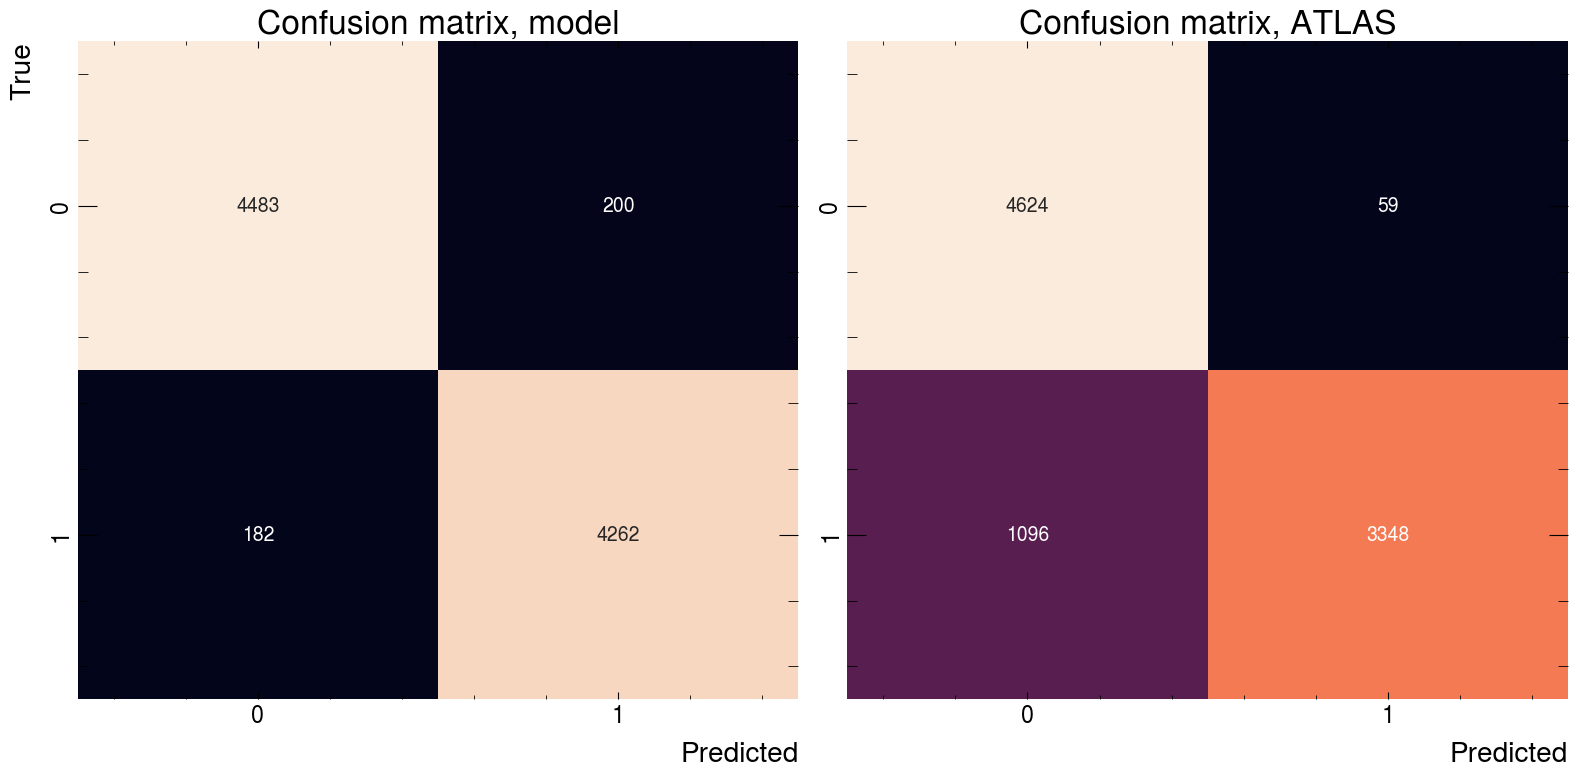

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(full_val_label, model_prediction)
cm2 = confusion_matrix(full_val_label, full_val_data['ATLAS_label'])
print(cm)
fig, ax = plt.subplots(1,2,figsize=(16, 8))
ax[0].set_title('Confusion matrix, model')
sns.heatmap(cm, annot=True, fmt='d', ax=ax[0], cbar = False)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

# fig, ax = plt.subplots(figsize=(8, 8))
ax[1].set_title('Confusion matrix, ATLAS')
sns.heatmap(cm2, annot=True, fmt='d', ax=ax[1], cbar = False)
ax[1].set_xlabel('Predicted')
# ax[1].set_ylabel('True')

fig.tight_layout()


/tmp/ipykernel_698989/745451703.py:1: RuntimeWarning: divide by zero encountered in divide
  difference_modelvsatlas = counts_model[0] / counts_atlas[0]
/tmp/ipykernel_698989/745451703.py:1: RuntimeWarning: invalid value encountered in divide
  difference_modelvsatlas = counts_model[0] / counts_atlas[0]
/tmp/ipykernel_698989/745451703.py:2: RuntimeWarning: divide by zero encountered in divide
  difference_modelvtruth = counts_model[0] / counts_truth[0]
/tmp/ipykernel_698989/745451703.py:2: RuntimeWarning: invalid value encountered in divide
  difference_modelvtruth = counts_model[0] / counts_truth[0]


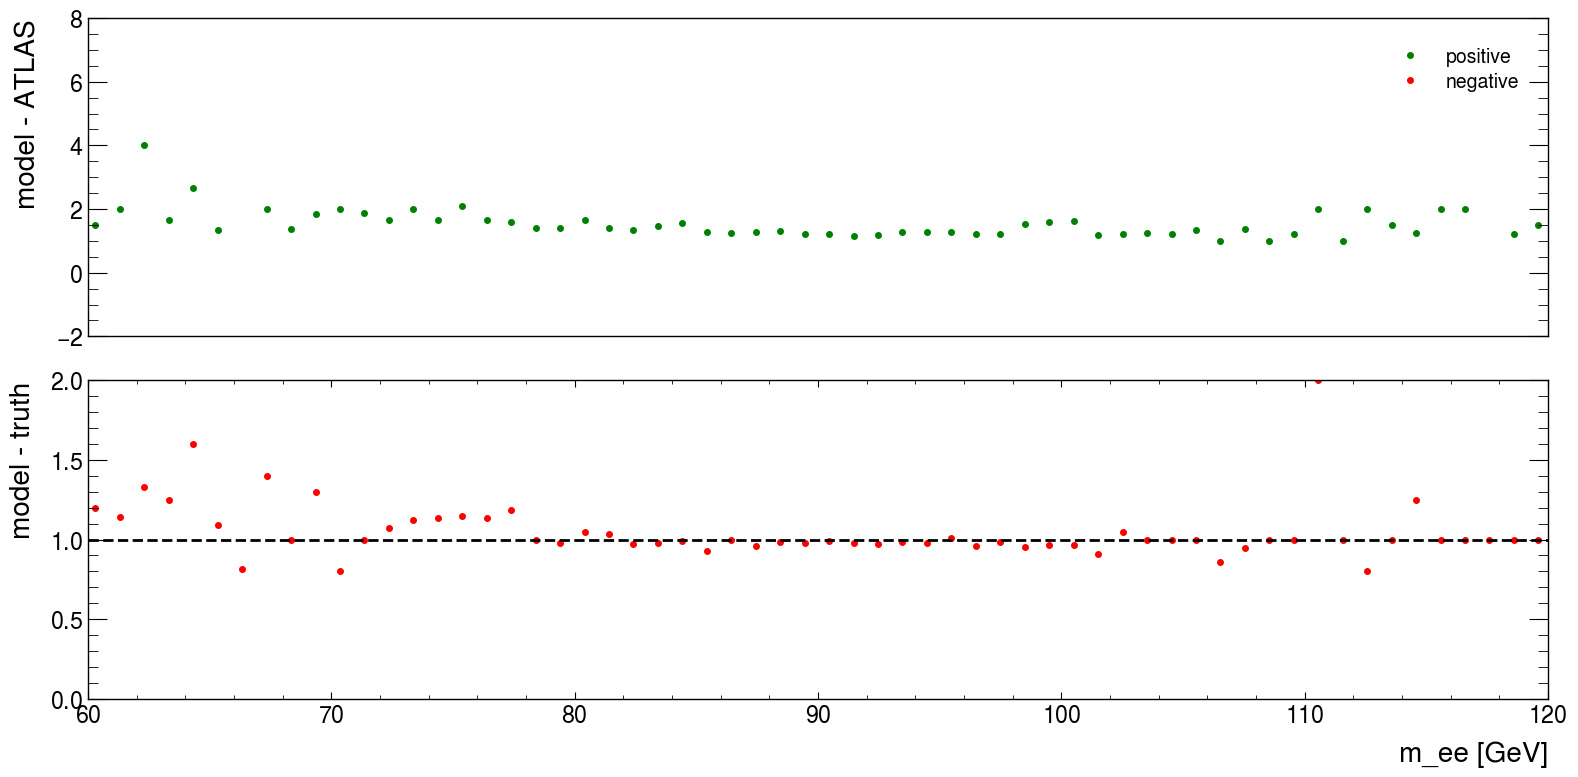

In [26]:
difference_modelvsatlas = counts_model[0] / counts_atlas[0]
difference_modelvtruth = counts_model[0] / counts_truth[0]
fig, ax = plt.subplots(2,1,figsize=(16, 8))
ax[0].plot(np.linspace(0,200,200)[difference_modelvsatlas>=0],difference_modelvsatlas[difference_modelvsatlas>=0],'.',color='g', label='positive')
ax[0].plot(np.linspace(0,200,200)[difference_modelvsatlas<0],difference_modelvsatlas[difference_modelvsatlas<0],'.',color='r' , label='negative')

ax[1].plot(np.linspace(0,200,200)[difference_modelvtruth==0],difference_modelvtruth[difference_modelvtruth==0],'.', color='g', label='identical')
ax[1].plot(np.linspace(0,200,200)[difference_modelvtruth!=0],difference_modelvtruth[difference_modelvtruth!=0],'.', color='r', label='wrong')
ax[1].set_xlabel('m_ee [GeV]')
ax[0].set_ylabel('model - ATLAS')
ax[1].set_ylabel('model - truth')
ax[0].legend()
ax[0].set_xticks([])
ax[0].set_xlim(60, 120)
ax[1].set_xlim(60, 120)
ax[1].set_ylim(0, 2)
ax[1].hlines(1, 60, 120, color='k', linestyle='--')
fig.tight_layout()

/tmp/ipykernel_698989/2277140537.py:7: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(np.linspace(0,200,40),counts_we_win[0]/counts_atlas[0],'.', label='we win/we lose')
/tmp/ipykernel_698989/2277140537.py:7: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(np.linspace(0,200,40),counts_we_win[0]/counts_atlas[0],'.', label='we win/we lose')


Text(0, 1, 'surplus/atlas')

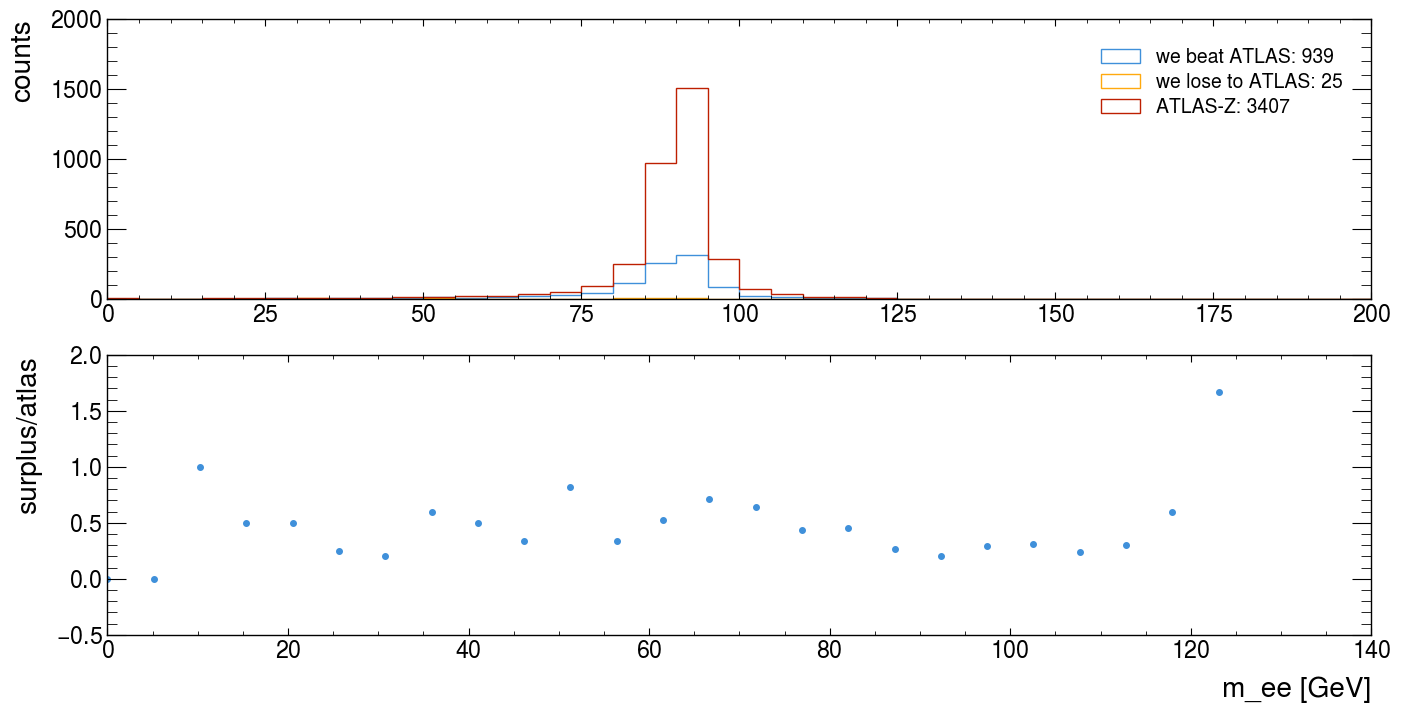

In [27]:
fig, ax = plt.subplots(2,1,figsize=(16, 8))
counts_we_win = ax[0].hist(full_val_data['m_ee'][mask_we_win], bins=40, range=(0, 200), histtype='step', label=f"we beat ATLAS: {len(full_val_data['m_ee'][mask_we_win])}")
counts_we_lose = ax[0].hist(full_val_data['m_ee'][mask_we_lose], bins=40, range=(0, 200), histtype='step', label=f"we lose to ATLAS: {len(full_val_data['m_ee'][mask_we_lose])}")
counts_atlas = ax[0].hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=40, range=(0, 200), histtype='step', label=f"ATLAS-Z: {len(full_val_data['m_ee'][full_val_data['ATLAS_label']==1])}")
ax[1].set_xlabel('m_ee [GeV]')
ax[0].legend()
ax[1].plot(np.linspace(0,200,40),counts_we_win[0]/counts_atlas[0],'.', label='we win/we lose')
ax[0].set_ylabel('counts')
ax[1].set_ylabel('surplus/atlas')

In [28]:
print(np.linspace(0,200,40))

[  0.           5.12820513  10.25641026  15.38461538  20.51282051
  25.64102564  30.76923077  35.8974359   41.02564103  46.15384615
  51.28205128  56.41025641  61.53846154  66.66666667  71.79487179
  76.92307692  82.05128205  87.17948718  92.30769231  97.43589744
 102.56410256 107.69230769 112.82051282 117.94871795 123.07692308
 128.20512821 133.33333333 138.46153846 143.58974359 148.71794872
 153.84615385 158.97435897 164.1025641  169.23076923 174.35897436
 179.48717949 184.61538462 189.74358974 194.87179487 200.        ]


In [29]:
print(full_val_data.columns)

Index(['event_index', 'el_index', 'runNumber', 'eventNumber',
       'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
       'm_ee', 'isZ', 'isZnew', 'el1_pt', 'el1_eta', 'el1_phi', 'el1_m',
       'el1_charge', 'el1_ptvarcone20', 'el1_topoetcone20', 'el1_topoetcone40',
       'el1_f1', 'el1_neflowisol20', 'el1_truthPdgId', 'el1_truthType',
       'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFcommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
       'el2_truthOrigin

no


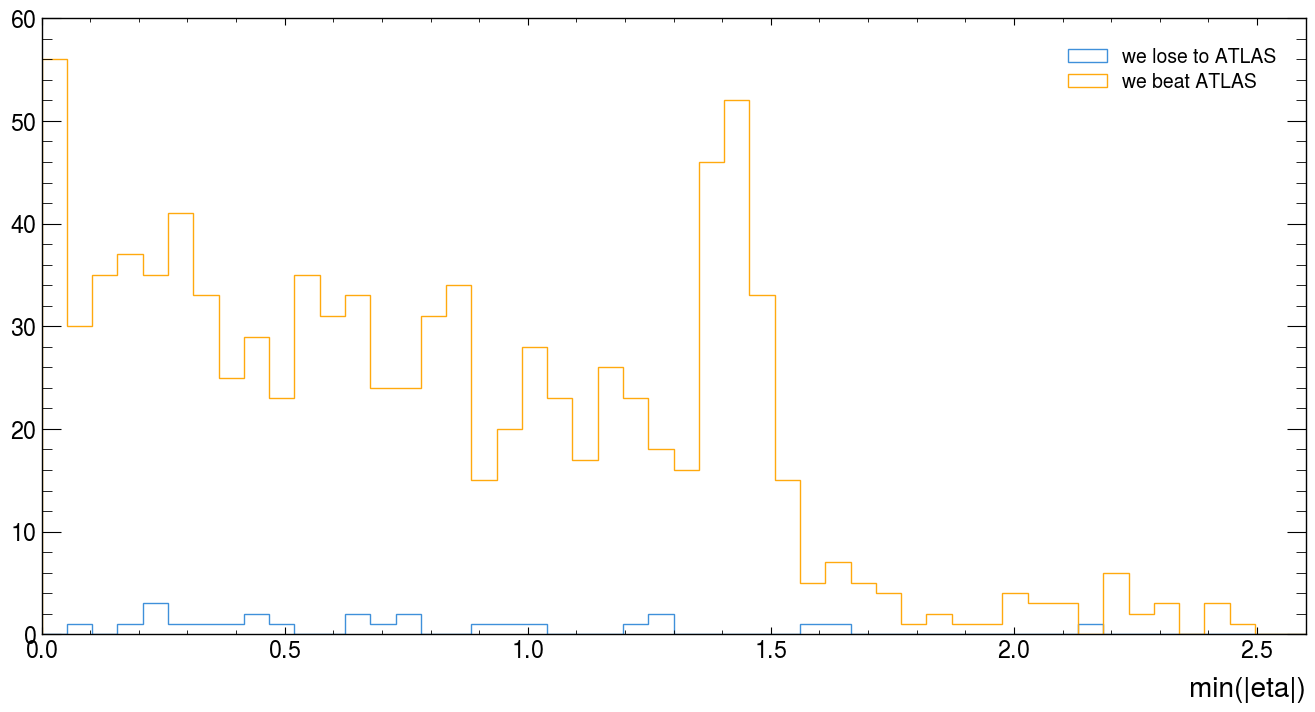

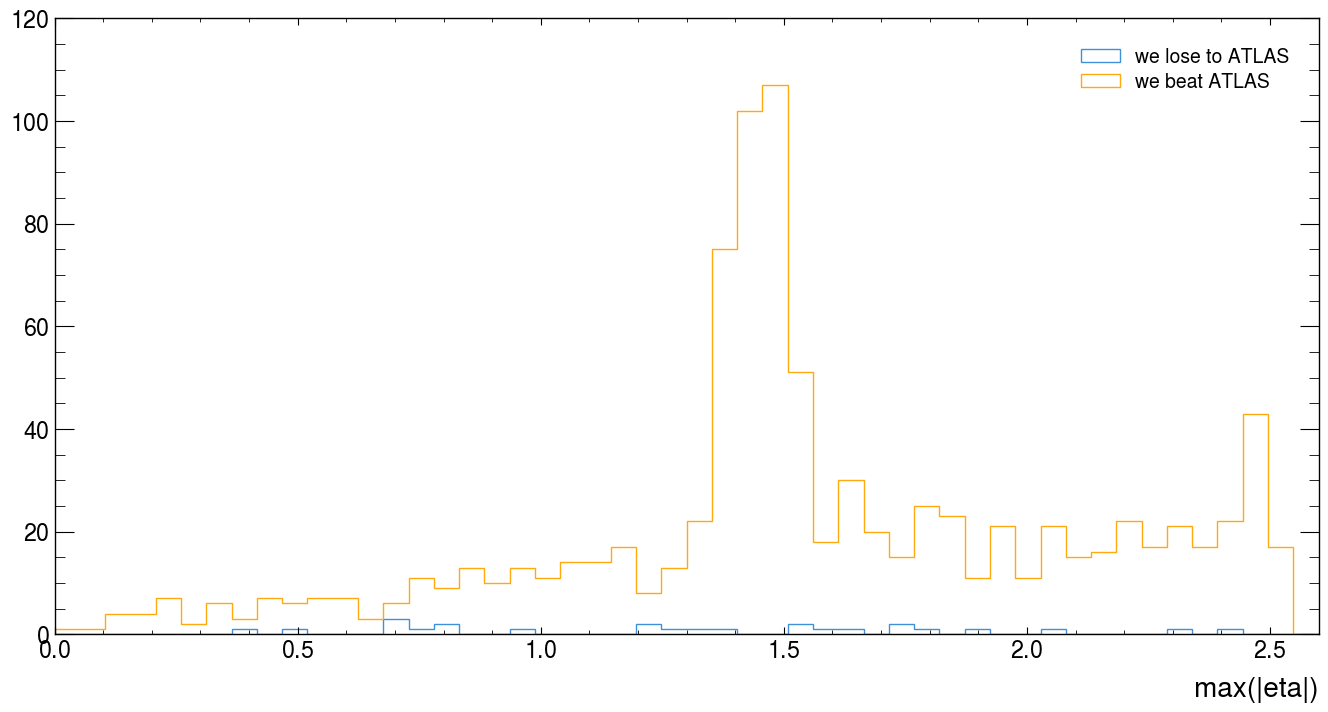

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(np.min(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_lose].values.T,full_val_data['el2_eta'][mask_we_lose].values.T))),axis=0),range=(0,2.6), bins=50, histtype='step', label='we lose to ATLAS')
ax.hist(np.min(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_win].values.T,full_val_data['el2_eta'][mask_we_win].values.T))),axis=0),range=(0,2.6), bins=50, histtype='step', label = 'we beat ATLAS')
ax.legend()
ax.set_xlabel('min(|eta|)')
ax.set_xlim(0,2.6)

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(np.max(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_lose].values.T,full_val_data['el2_eta'][mask_we_lose].values.T))),axis=0),range=(0,2.6), bins=50, histtype='step', label='we lose to ATLAS')
ax.hist(np.max(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_win].values.T,full_val_data['el2_eta'][mask_we_win].values.T))),axis=0),range=(0,2.6), bins=50, histtype='step', label='we beat ATLAS')
ax.legend()
ax.set_xlabel('max(|eta|)')
ax.set_xlim(0,2.6)
print('no')

In [31]:
#surplus correct identifications:
mask_surplus = (full_val_data['ATLAS_label'] == 0) & (model_prediction == 1) & (full_val_label == 1)
num_surplus = len(full_val_data[mask_surplus])

print(f'number of surplus correct identifications: {num_surplus}')
# print number of pairs with same charge that model predicts as Z
mask_same_charge = (full_val_data['el1_charge'] == full_val_data['el2_charge'])
mask_same_charge_model = (model_prediction == 1)
mask_same_charge_truth = (full_val_label == 1)
mask_same_charge_atlas = (full_val_data['ATLAS_label'] == 0)

mask_same_charge_model_and_truth = mask_same_charge & mask_same_charge_model & mask_same_charge_truth 
mask_same_charge_model_and_truth_missing = mask_same_charge & ~mask_same_charge_model & mask_same_charge_truth

num_surplus_charge = len(full_val_data[mask_same_charge_model_and_truth])

print(f'number of pairs with same charge that model correctly predicts as Z: {num_surplus_charge}, {num_surplus_charge/num_surplus*100:.2f}% of surplus')

mask_high_eta = (np.abs(full_val_data['el1_eta']) > 2.47) | (np.abs(full_val_data['el2_eta']) > 2.47)
mask_high_eta_model = (model_prediction == 1)
mask_high_eta_truth = (full_val_label == 1)
mask_high_eta_atlas = (full_val_data['ATLAS_label'] == 0)

mask_high_eta_model_and_truth = mask_high_eta & mask_high_eta_model & mask_high_eta_truth & mask_high_eta_atlas
mask_high_eta_model_and_truth_missing = mask_high_eta & ~mask_high_eta_model & mask_high_eta_truth

num_surplus_eta = len(full_val_data[mask_high_eta_model_and_truth])

print(f'number of pairs with high eta that model correctly predicts as Z: {num_surplus_eta}, {num_surplus_eta/num_surplus*100:.2f}% of surplus')

# low momentum

mask_low_momentum = (full_val_data['el1_pt'] < 10000) | (full_val_data['el2_pt'] < 10000)
mask_low_momentum_model = (model_prediction == 1)
mask_low_momentum_truth = (full_val_label == 1)
mask_low_momentum_atlas = (full_val_data['ATLAS_label'] == 0)

mask_low_momentum_model_and_truth = mask_low_momentum & mask_low_momentum_model & mask_low_momentum_truth & mask_low_momentum_atlas
mask_low_momentum_model_and_truth_missing = mask_low_momentum & ~mask_low_momentum_model & mask_low_momentum_truth

num_surplus_momentum = len(full_val_data[mask_low_momentum_model_and_truth])

print(f'number of pairs with low momentum that model correctly predicts as Z: {num_surplus_momentum}, {num_surplus_momentum/num_surplus*100:.2f}% of surplus')

# number of pairs where one does not satisfy the loose LH

mask_loose_LH = (full_val_data['el1_DFcommonElectrons_LHLoose'] == 0) | (full_val_data['el2_DFcommonElectrons_LHLoose'] == 0)
mask_loose_LH_model = (model_prediction == 1)
mask_loose_LH_truth = (full_val_label == 1)
mask_loose_LH_atlas = (full_val_data['ATLAS_label'] == 0)

mask_loose_LH_model_and_truth = mask_loose_LH & mask_loose_LH_model & mask_loose_LH_truth & mask_loose_LH_atlas
mask_loose_LH_model_and_truth_missing = mask_loose_LH & ~mask_loose_LH_model & mask_loose_LH_truth

num_surplus_loose_LH = len(full_val_data[mask_loose_LH_model_and_truth])

print(f'number of pairs where one does not satisfy the loose LH that model correctly predicts as Z: {num_surplus_loose_LH}, {num_surplus_loose_LH/num_surplus*100:.2f}% of surplus')

# number of pairs where one is in the crack region

mask_crack = ~full_val_data['Crack_mask']
mask_crack_model = (model_prediction == 1)
mask_crack_truth = (full_val_label == 1)
mask_crack_atlas = (full_val_data['ATLAS_label'] == 0)

mask_crack_model_and_truth = mask_crack & mask_crack_model & mask_crack_truth & mask_crack_atlas
mask_crack_model_and_truth_missing = mask_crack & ~mask_crack_model & mask_crack_truth

num_surplus_crack = len(full_val_data[mask_crack_model_and_truth])

print(f'number of pairs where one is in the crack region that model correctly predicts as Z: {num_surplus_crack}, {num_surplus_crack/num_surplus*100:.2f}% of surplus')

# number of pairs where one is does not satisfy the d0/sigma_d0 requirement

mask_d0divsigma_d0 = ~full_val_data['d0divsigma_d0_mask']
mask_d0divsigma_d0_model = (model_prediction == 1)
mask_d0divsigma_d0_truth = (full_val_label == 1)
mask_d0divsigma_d0_atlas = (full_val_data['ATLAS_label'] == 0)

mask_d0divsigma_d0_model_and_truth = mask_d0divsigma_d0 & mask_d0divsigma_d0_model & mask_d0divsigma_d0_truth & mask_d0divsigma_d0_atlas
mask_d0divsigma_d0_model_and_truth_missing = mask_d0divsigma_d0 & ~mask_d0divsigma_d0_model & mask_d0divsigma_d0_truth

num_surplus_d0divsigma_d0 = len(full_val_data[mask_d0divsigma_d0_model_and_truth])

print(f'number of pairs where one does not satisfy the d0/sigma_d0 requirement that model correctly predicts as Z: {num_surplus_d0divsigma_d0}, {num_surplus_d0divsigma_d0/num_surplus*100:.2f}% of surplus')

# number of pairs where one does not satisfy the dz0*sin(theta) requirement

mask_dz0_sinthetamask = ~full_val_data['dz0_sinthetamask']
mask_dz0_sinthetamask_model = (model_prediction == 1)
mask_dz0_sinthetamask_truth = (full_val_label == 1)
mask_dz0_sinthetamask_atlas = (full_val_data['ATLAS_label'] == 0)

mask_dz0_sinthetamask_model_and_truth = mask_dz0_sinthetamask & mask_dz0_sinthetamask_model & mask_dz0_sinthetamask_truth & mask_dz0_sinthetamask_atlas
mask_dz0_sinthetamask_model_and_truth_missing = mask_dz0_sinthetamask & ~mask_dz0_sinthetamask_model & mask_dz0_sinthetamask_truth

num_surplus_dz0_sinthetamask = len(full_val_data[mask_dz0_sinthetamask_model_and_truth])

print(f'number of pairs where one does not satisfy the dz0*sin(theta) requirement that model correctly predicts as Z: {num_surplus_dz0_sinthetamask}, {num_surplus_dz0_sinthetamask/num_surplus*100:.2f}% of surplus')

number of surplus correct identifications: 939
number of pairs with same charge that model correctly predicts as Z: 23, 2.45% of surplus
number of pairs with high eta that model correctly predicts as Z: 41, 4.37% of surplus
number of pairs with low momentum that model correctly predicts as Z: 24, 2.56% of surplus
number of pairs where one does not satisfy the loose LH that model correctly predicts as Z: 555, 59.11% of surplus
number of pairs where one is in the crack region that model correctly predicts as Z: 435, 46.33% of surplus
number of pairs where one does not satisfy the d0/sigma_d0 requirement that model correctly predicts as Z: 5, 0.53% of surplus
number of pairs where one does not satisfy the dz0*sin(theta) requirement that model correctly predicts as Z: 10, 1.06% of surplus


<BarContainer object of 7 artists>

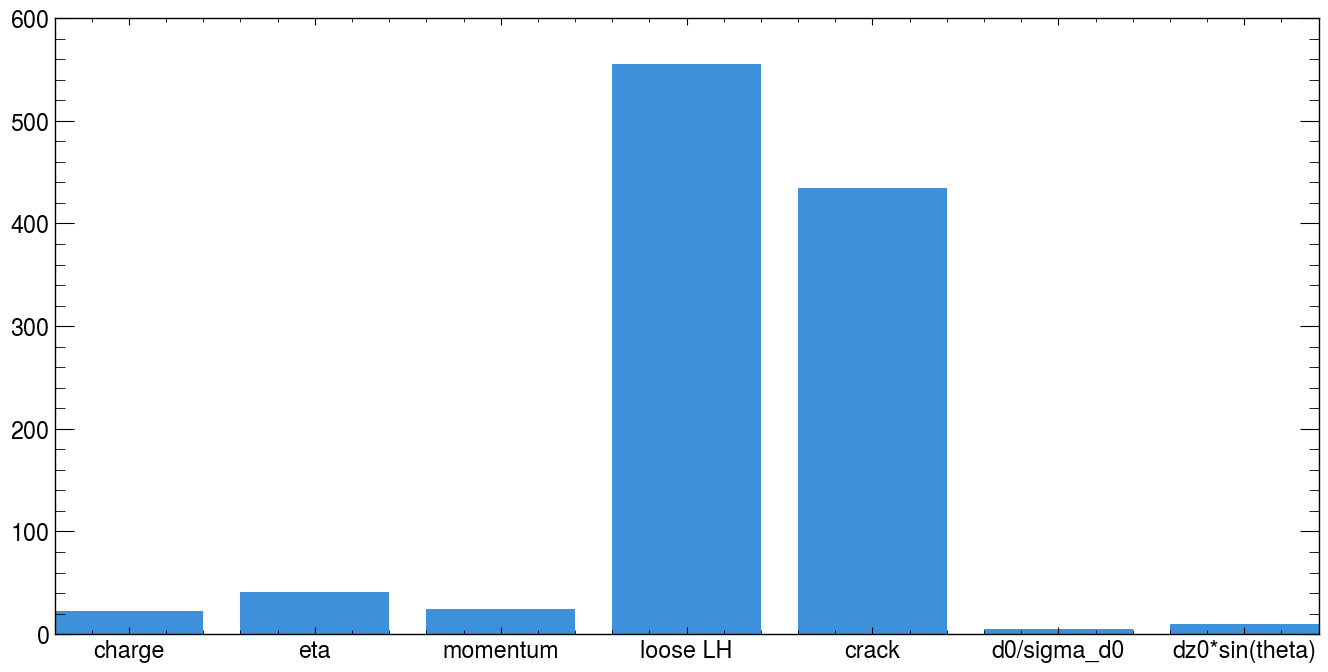

In [32]:
# bar chart i guess?
bar = [num_surplus_charge, num_surplus_eta, num_surplus_momentum, num_surplus_loose_LH, num_surplus_crack, num_surplus_d0divsigma_d0, num_surplus_dz0_sinthetamask]

fig, ax = plt.subplots(figsize=(16, 8))
ax.bar(['charge', 'eta', 'momentum', 'loose LH', 'crack', 'd0/sigma_d0', 'dz0*sin(theta)'], [num_surplus_charge, num_surplus_eta, num_surplus_momentum, num_surplus_loose_LH, num_surplus_crack, num_surplus_d0divsigma_d0, num_surplus_dz0_sinthetamask])



In [33]:
# print(np.min(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_lose].values.T,full_val_data['el2_eta'][mask_we_lose].values.T))),axis=0))
# print(np.abs(np.vstack((full_val_data['el1_eta'][mask_we_lose].values.T,full_val_data['el2_eta'][mask_we_lose].values.T))))

In [34]:
surplus_matrix = np.zeros((len(bar),len(bar)))
label_matrix = np.zeros((len(bar),len(bar)), dtype='str')
mask_matrix = np.vstack((mask_same_charge_model_and_truth, mask_high_eta_model_and_truth, mask_low_momentum_model_and_truth, mask_loose_LH_model_and_truth, mask_crack_model_and_truth, mask_d0divsigma_d0_model_and_truth, mask_dz0_sinthetamask_model_and_truth))
missing_matrix = np.vstack((mask_same_charge_model_and_truth_missing, mask_high_eta_model_and_truth_missing, mask_low_momentum_model_and_truth_missing, mask_loose_LH_model_and_truth_missing, mask_crack_model_and_truth_missing, mask_d0divsigma_d0_model_and_truth_missing, mask_dz0_sinthetamask_model_and_truth_missing))
for i in range(len(bar)):
    surplus_matrix[i,i] = bar[i]
    for j in range(i+1,len(bar)):
        surplus_matrix[i,j] = len(full_val_data[mask_matrix[i] & mask_matrix[j]])
        label_matrix[i,j] = 'and'
        surplus_matrix[j,i] = len(full_val_data[mask_matrix[i] & ~mask_matrix[j]])
        label_matrix[j,i] = 'not'

In [35]:
print(surplus_matrix)
print(label_matrix)

[[ 23.   2.   0.  12.   2.   0.   2.]
 [ 21.  41.   1.  40.   4.   0.   1.]
 [ 23.  40.  24.   8.   3.   0.   0.]
 [ 11.   1.  16. 555.  82.   5.   6.]
 [ 21.  37.  21. 473. 435.   0.   1.]
 [ 23.  41.  24. 550. 435.   5.   2.]
 [ 21.  40.  24. 549. 434.   3.  10.]]
[['' 'a' 'a' 'a' 'a' 'a' 'a']
 ['n' '' 'a' 'a' 'a' 'a' 'a']
 ['n' 'n' '' 'a' 'a' 'a' 'a']
 ['n' 'n' 'n' '' 'a' 'a' 'a']
 ['n' 'n' 'n' 'n' '' 'a' 'a']
 ['n' 'n' 'n' 'n' 'n' '' 'a']
 ['n' 'n' 'n' 'n' 'n' 'n' '']]


Text(0.5, 1.0, 'surplus Z correctly identified by model')

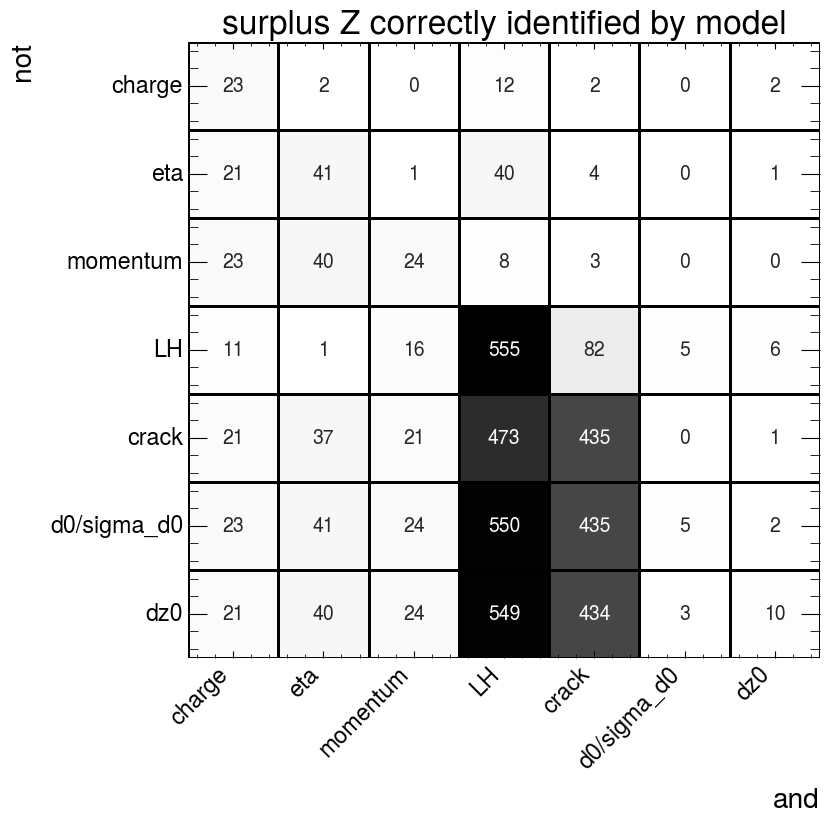

In [36]:
# Create the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the matrix without color (using a white colormap) and add borders with linecolor and linewidths
sns.heatmap(surplus_matrix, annot=True, ax=ax, cbar=False, cmap='Greys', 
            linewidths=1, linecolor='black', fmt='.0f')

# Set custom labels for x and y axes
ax.set_xticklabels(['charge', 'eta', 'momentum', 'LH', 'crack', 'd0/sigma_d0', 'dz0'], rotation=45, ha='right')
ax.set_yticklabels(['charge', 'eta', 'momentum', 'LH', 'crack', 'd0/sigma_d0', 'dz0'], rotation=0)

# Set axis labels and title
ax.set_xlabel('and')
ax.set_ylabel('not')
ax.set_title('surplus Z correctly identified by model')


(7, 15)
[['' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c']
 ['' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e' 'e']
 ['' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm' 'm']
 ['' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L']
 ['' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c' 'c']
 ['' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd']
 ['' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd' 'd']]
no


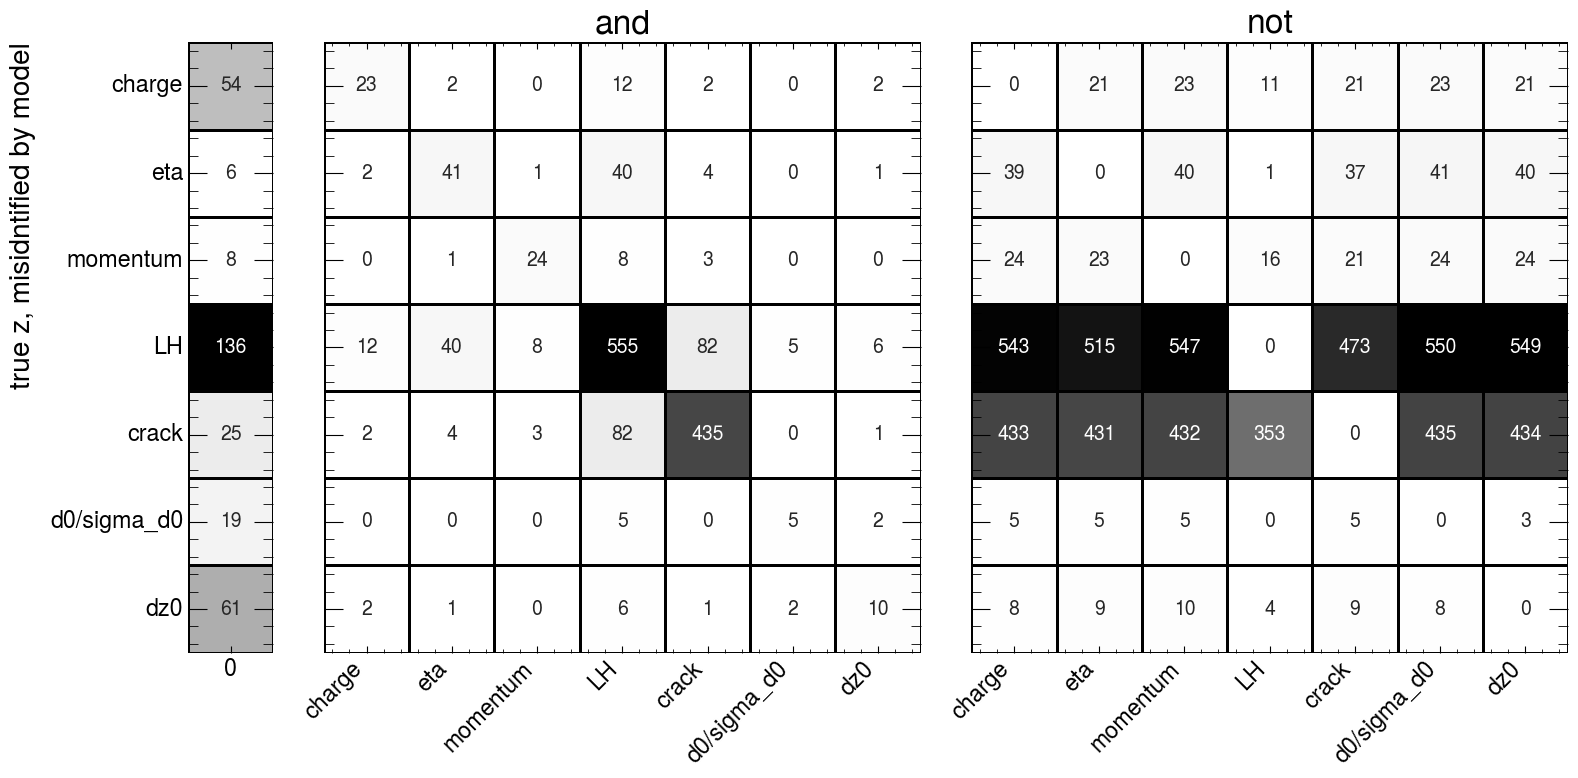

In [37]:
label_vector = ['charge', 'eta', 'momentum', 'LH', 'crack', 'd0/sigma_d0', 'dz0']
surplus_matrix_2 = np.zeros((len(bar),len(bar)*2+1), dtype='int')
surplus_matrix_2_labels = np.zeros((len(bar),len(bar)*2+1), dtype='str')
for i in range(len(bar)):
    surplus_matrix_2[i,0] = (len(full_val_data[missing_matrix[i]]))#, len(full_val_data[missing_matrix[i]]))
    for j in range(len(bar)*2):
        if j<len(bar):
            surplus_matrix_2[i,j+1] = len(full_val_data[mask_matrix[i] & mask_matrix[j]])
            surplus_matrix_2_labels[i,j+1] = label_vector[i] + " and " + label_vector[j]
        else:
            surplus_matrix_2[i,j+1] = len(full_val_data[mask_matrix[i-len(bar)] & ~mask_matrix[j-len(bar)]])
            surplus_matrix_2_labels[i,j+1] = label_vector[i-len(bar)] + " and not " + label_vector[j-len(bar)]

print(surplus_matrix_2.shape)

fig, ax = plt.subplots(1,3,figsize=(16,8),gridspec_kw={'width_ratios': [1,7,7]})
sns.heatmap(surplus_matrix_2[:,1:8], annot=True, ax=ax[1], cbar=False, cmap='Greys',
            linewidths=1, linecolor='black', fmt='.0f')
sns.heatmap(surplus_matrix_2[:,8:], annot=True, ax=ax[2], cbar=False, cmap='Greys',
            linewidths=1, linecolor='black', fmt='.0f')
sns.heatmap(surplus_matrix_2[:,0].reshape(-1,1), annot=True, ax=ax[0], cbar=False, cmap='Greys',
            linewidths=1, linecolor='black', fmt='.0f')
ax[0].set_yticklabels(label_vector, rotation=0)
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[0].set_ylabel('true z, misidntified by model')
ax[1].set_xticklabels(label_vector, rotation=45, ha='right')
ax[2].set_xticklabels(label_vector, rotation=45, ha='right')
ax[1].set_title('and')
ax[2].set_title('not')

fig.tight_layout()
# ax.set_xticklabels(['missing', 'charge', 'eta', 'momentum', 'LH', 'crack', 'd0/sigma_d0', 'dz0', 'charge', 'eta', 'momentum', 'LH', 'crack', 'd0/sigma_d0', 'dz0'], rotation=45, ha='right')
print(surplus_matrix_2_labels)


print('no')

no


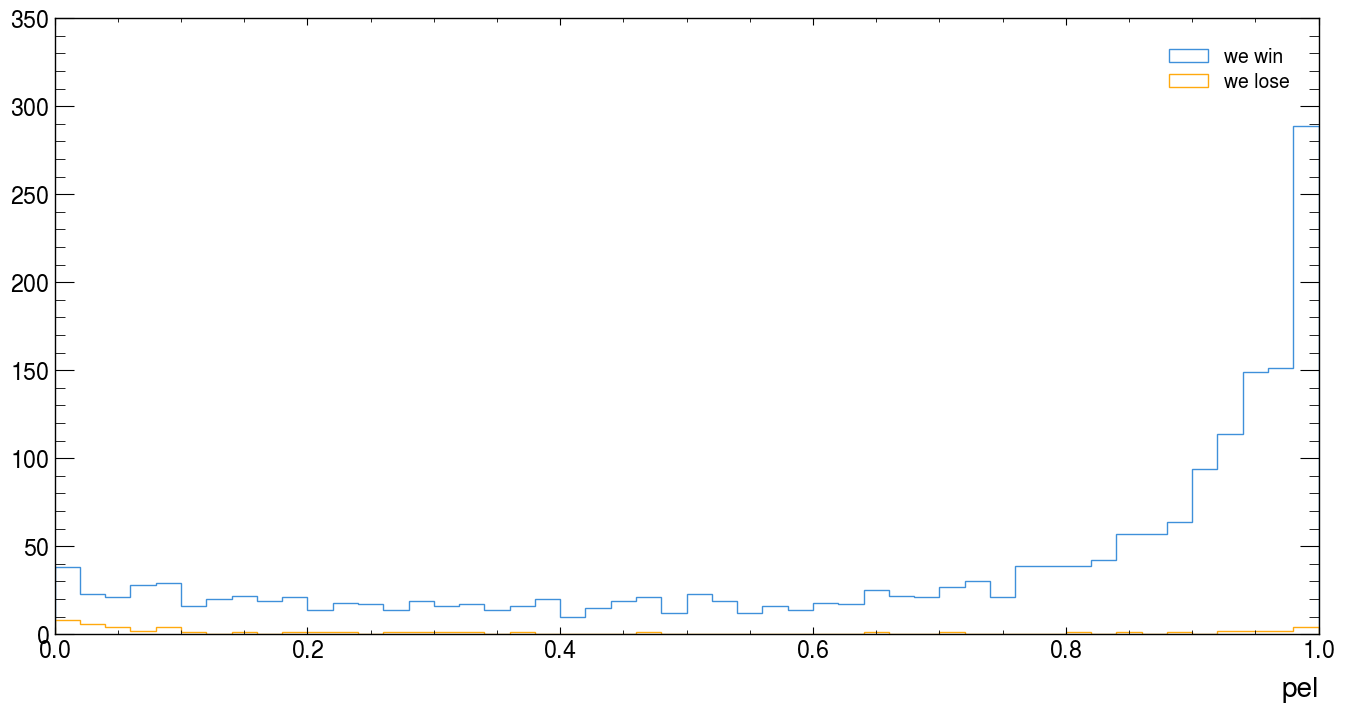

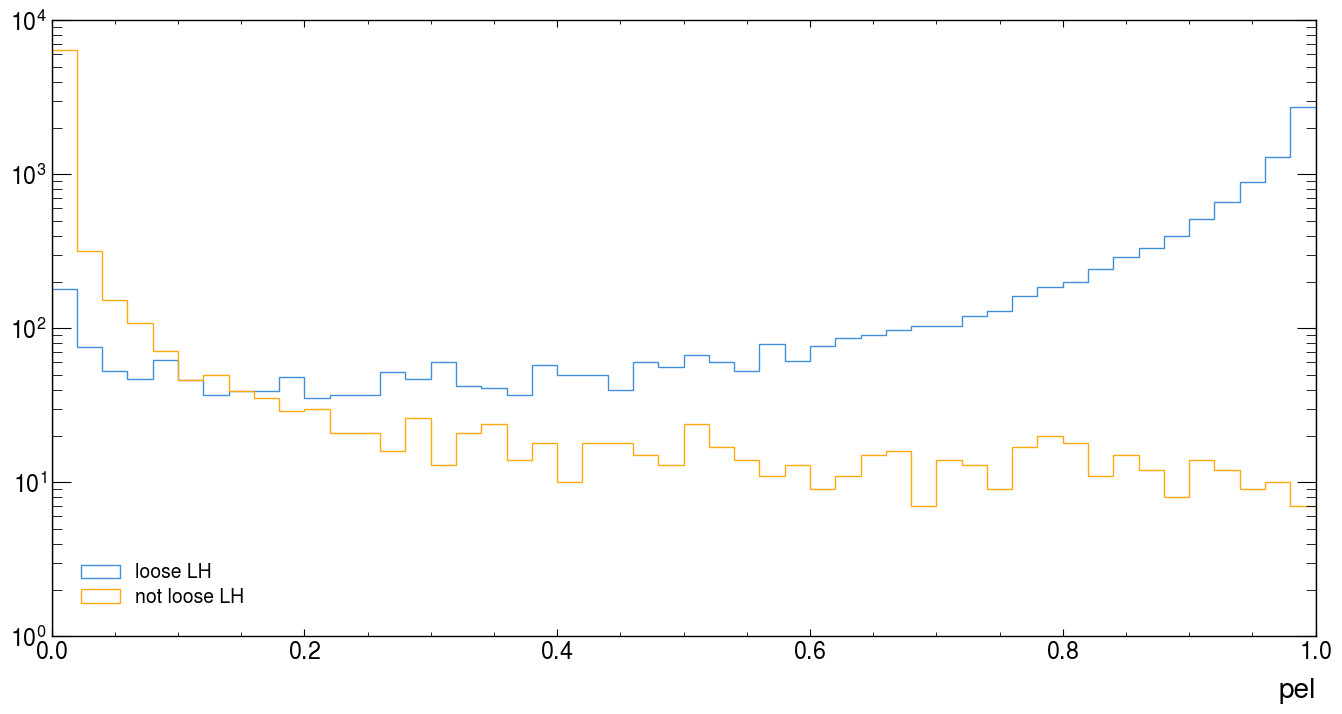

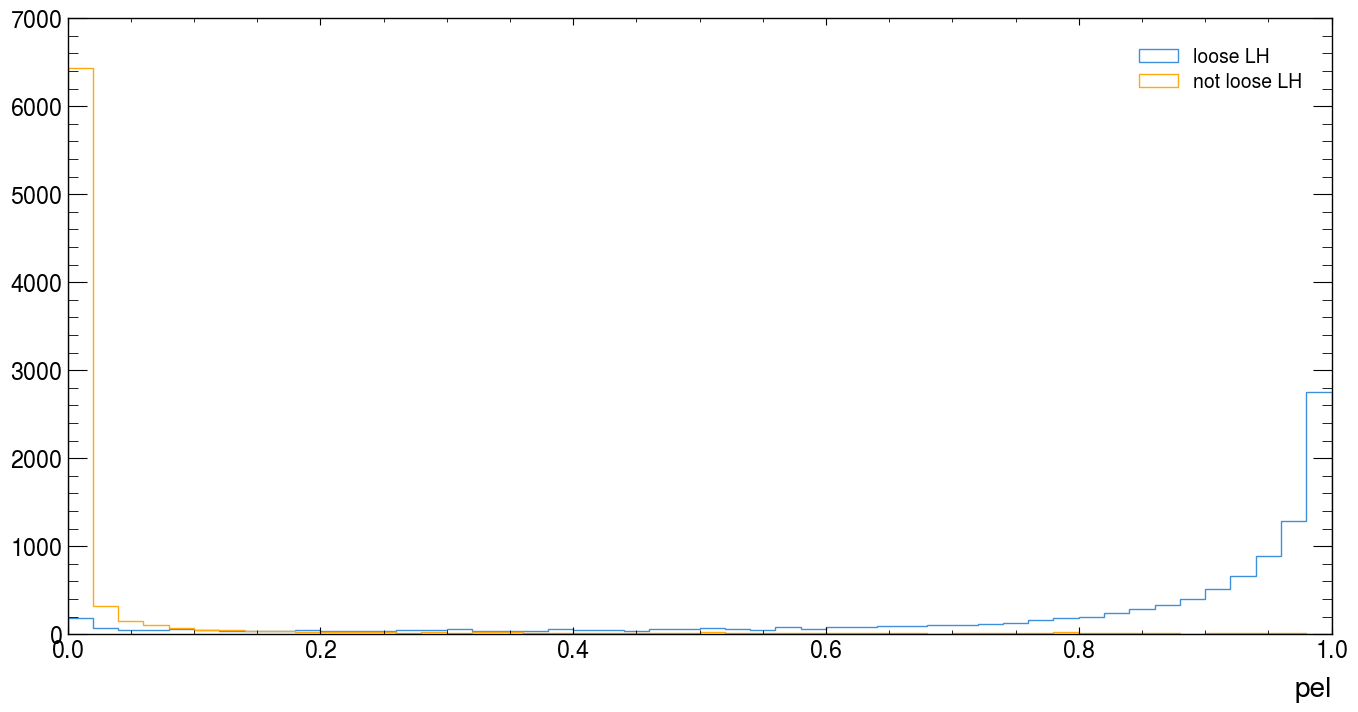

In [38]:
pel_values = np.append(full_val_data['el1_DFCommonElectrons_pel'].values, full_val_data['el2_DFCommonElectrons_pel'].values)

pel_values_we_win = np.append(full_val_data['el1_DFCommonElectrons_pel'][mask_we_win].values, full_val_data['el2_DFCommonElectrons_pel'][mask_we_win].values)

pel_values_we_lose = np.append(full_val_data['el1_DFCommonElectrons_pel'][mask_we_lose].values, full_val_data['el2_DFCommonElectrons_pel'][mask_we_lose].values)

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(pel_values_we_win, bins=50,range=(0, 1), histtype='step', label='we win')
ax.hist(pel_values_we_lose, bins=50,range=(0, 1), histtype='step', label='we lose')
ax.legend()
ax.set_xlabel('pel')
# ax.set_yscale('log')

mask_loose_LH = np.append(full_val_data['el1_DFcommonElectrons_LHLoose'].values, full_val_data['el2_DFcommonElectrons_LHLoose'].values)

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(pel_values[mask_loose_LH==1], bins=50,range=(0, 1), histtype='step', label='loose LH')
ax.hist(pel_values[mask_loose_LH==0], bins=50,range=(0, 1), histtype='step', label='not loose LH')
ax.legend()
ax.set_xlabel('pel')
ax.set_yscale('log')

fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(pel_values[mask_loose_LH==1], bins=50,range=(0, 1), histtype='step', label='loose LH')
ax.hist(pel_values[mask_loose_LH==0], bins=50,range=(0, 1), histtype='step', label='not loose LH')
ax.legend()
ax.set_xlabel('pel')
print('no')

In [39]:
# lets look at some z->ee+gamma events:

pure_background_full_sample = pd.read_parquet('/groups/hep/kinch/H_Zg/samples_processed/Zeeg_bck_ggF_MC__reduced_eepairs_14sep_40000events.parquet')

dz_bck = np.abs(pure_background_full_sample['el1_GSFTrack_z0']-pure_background_full_sample['el2_GSFTrack_z0'])
sigma_dz_bck = np.sqrt(pure_background_full_sample['el1_GSF_Track_Var3']+pure_background_full_sample['el2_GSF_Track_Var3'])
pure_background_full_sample['dz'] = dz_bck
pure_background_full_sample['sigma_dz'] = sigma_dz_bck

# pure_background_full_sample = pure_background_full_sample.drop(columns=bck_drop_list)


# generate ATLAS label, dz and sigma_dz for the background sample

ATLAS_label_bck = pure_background_full_sample['el1_DFcommonElectrons_LHLoose'] & pure_background_full_sample['el2_DFcommonElectrons_LHLoose'] \
    & (np.abs(pure_background_full_sample['el1_eta']) < 2.47) & (np.abs(pure_background_full_sample['el2_eta']) < 2.47) & (pure_background_full_sample['el1_pt'] > 10000) \
    & (pure_background_full_sample['el2_pt'] > 10000) & (pure_background_full_sample['el1_charge'] != pure_background_full_sample['el2_charge'])
eta_mask_bck = (np.abs(pure_background_full_sample['el1_eta']) < 2.47) & (np.abs(pure_background_full_sample['el2_eta']) < 2.47)
Crack_eta_bck = (np.abs(pure_background_full_sample['el1_eta']) > 1.37) & (np.abs(pure_background_full_sample['el1_eta']) < 1.52) | (np.abs(pure_background_full_sample['el2_eta']) > 1.37) & (np.abs(pure_background_full_sample['el2_eta']) < 1.52)

ATLAS_label_bck = ATLAS_label_bck & ~Crack_eta_bck

d0divsigmad0_1_bck = np.abs(pure_background_full_sample['el1_GSFTrack_d0'])/np.sqrt(pure_background_full_sample['el1_GSF_Track_Var1'])
d0divsigmad0_2_bck = np.abs(pure_background_full_sample['el2_GSFTrack_d0'])/np.sqrt(pure_background_full_sample['el2_GSF_Track_Var1'])

d0divsigmamask_bck = (d0divsigmad0_1_bck < 5) & (d0divsigmad0_2_bck < 5)
ATLAS_label_bck = ATLAS_label_bck & d0divsigmamask_bck

dz0_sintheta1_bck = (np.abs(pure_background_full_sample['dz']*np.sin(pure_background_full_sample['el1_GSFTrack_theta'])))
dz0_sintheta2_bck = (np.abs(pure_background_full_sample['dz']*np.sin(pure_background_full_sample['el2_GSFTrack_theta'])))

dz0_sinthetamask_bck = (dz0_sintheta1_bck < 0.5*np.sqrt(2)) & (dz0_sintheta2_bck < 0.5*np.sqrt(2)) # sqrt2 from troels magic?
ATLAS_label_bck = ATLAS_label_bck & dz0_sinthetamask_bck


# model prediction on background:

# print(X_test.columns)
# print(pure_background_full_sample.columns)

pure_background_full_sample['ATLAS_label'] = ATLAS_label_bck
pure_background_full_sample['Crack_mask'] = Crack_eta_bck
pure_background_full_sample['eta_mask'] = eta_mask_bck
pure_background_full_sample['d0divsigma_d0_mask'] = d0divsigmamask_bck
pure_background_full_sample['dz0_sinthetamask'] = dz0_sinthetamask_bck

#hack because ugly code
pure_background_full_sample['isZnew'] = pure_background_full_sample['isZ']




In [40]:
background_energy_mask = (pure_background_full_sample['el1_pt'] > 9000) & (pure_background_full_sample['el2_pt'] > 9000)

pred_background_data = pure_background_full_sample.drop(columns=drop_list)


model_prediction_background_proba = model.predict_proba(pred_background_data)[:,1]
model_prediction_background = model.predict(pred_background_data)

no


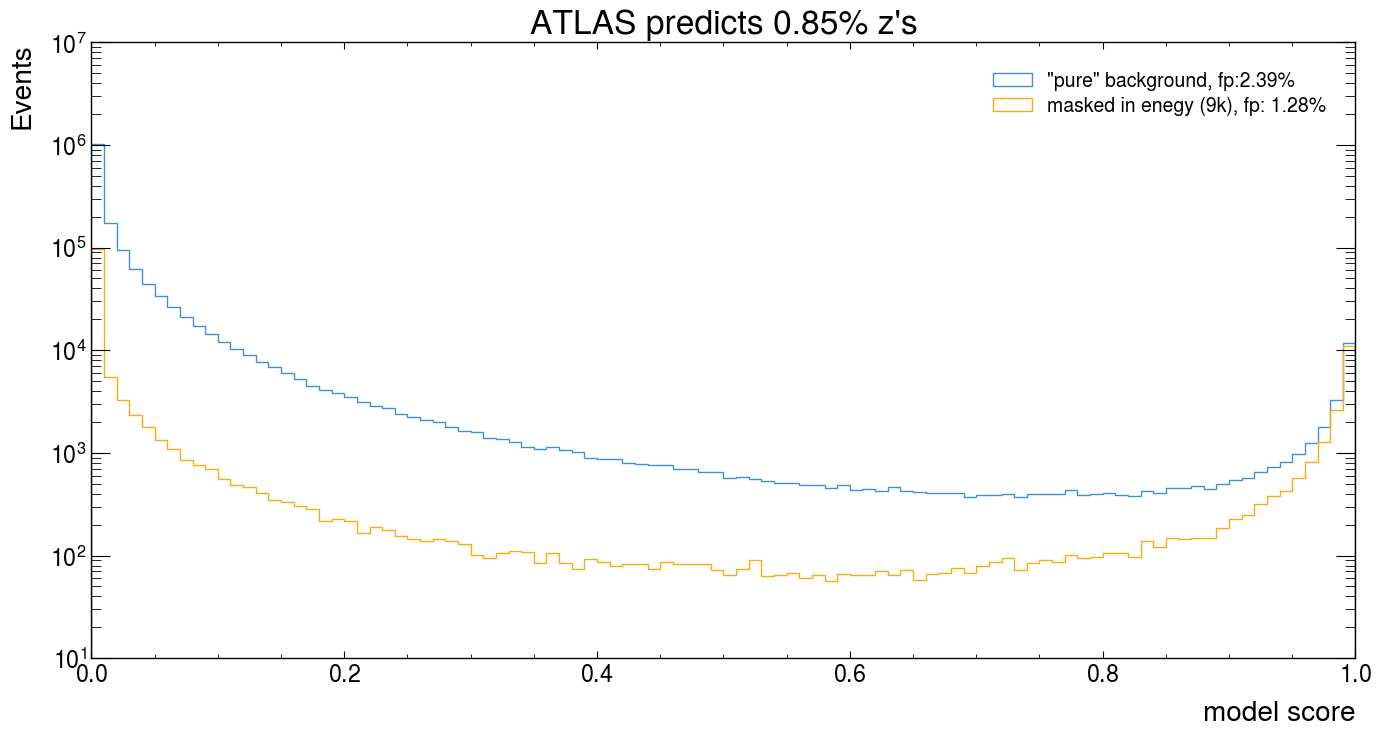

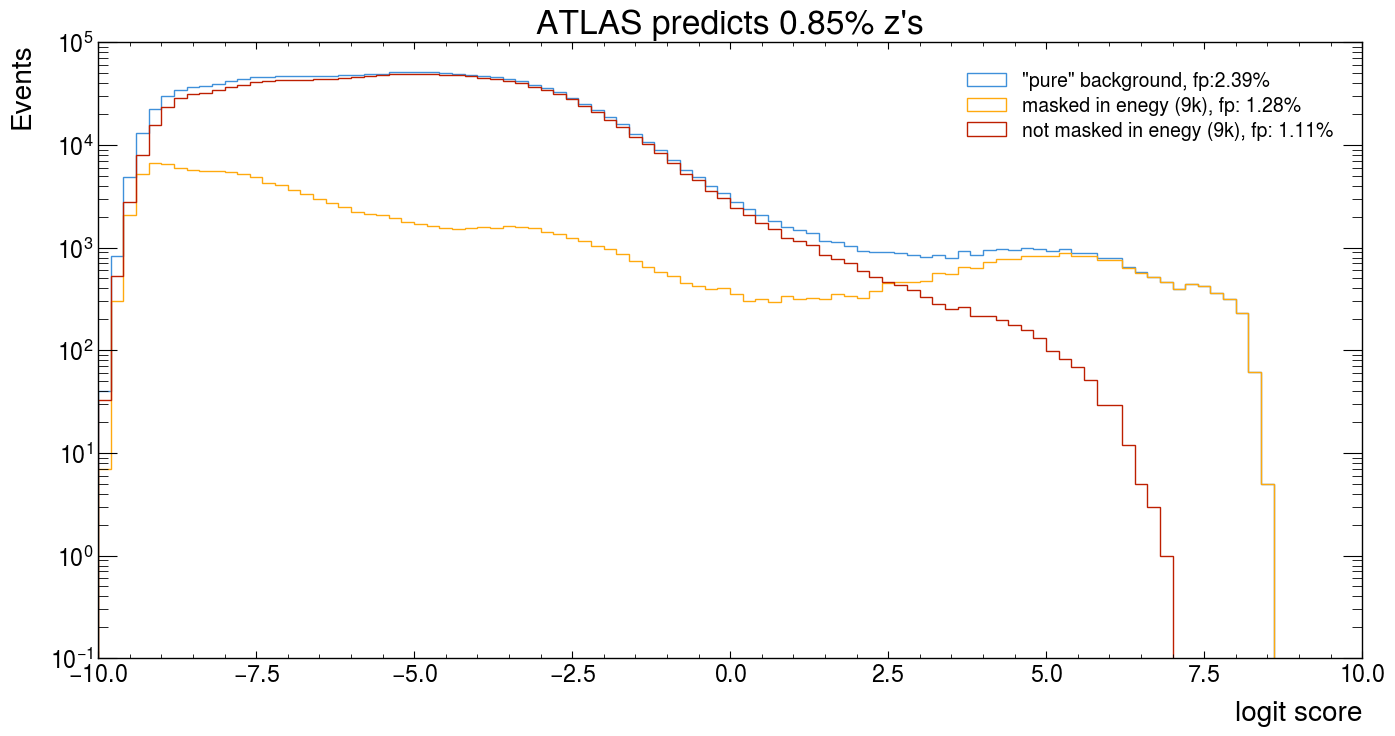

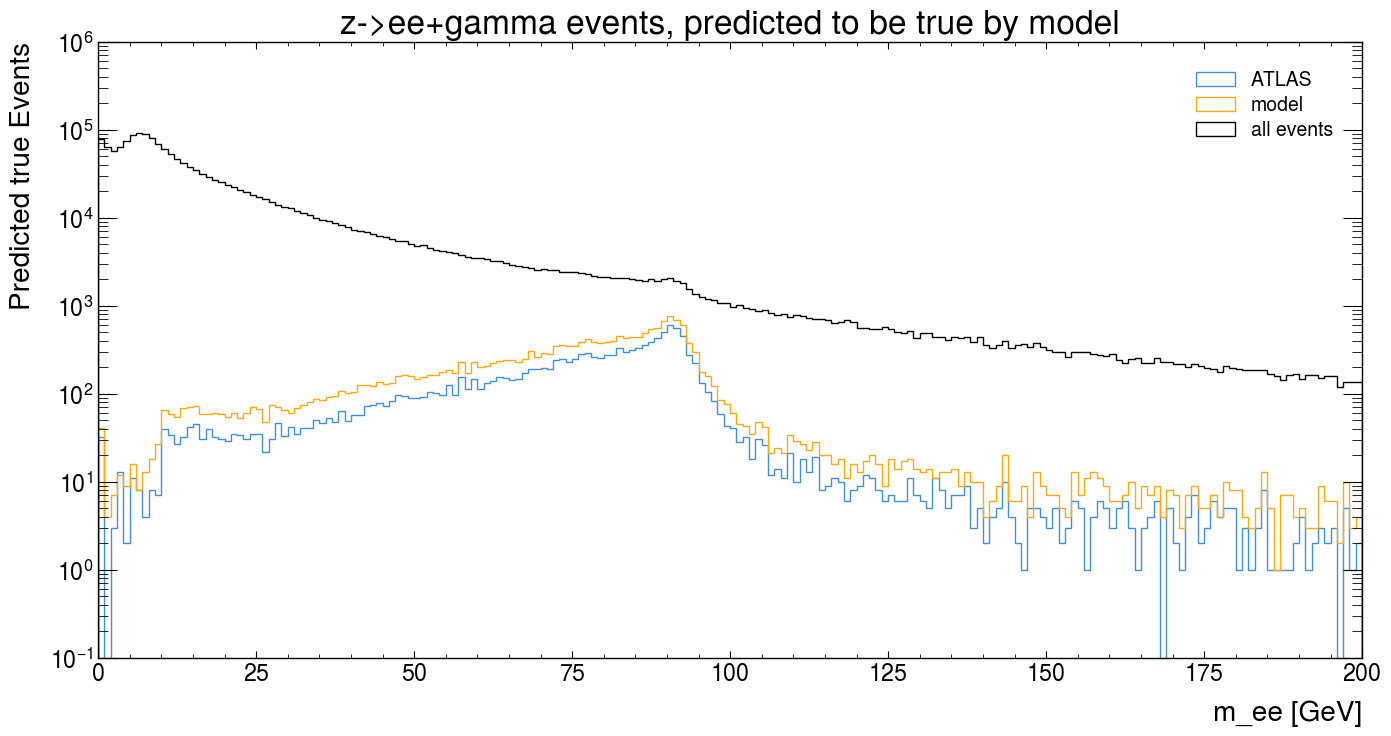

In [41]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(model_prediction_background_proba, bins=100,range=(0,1), histtype='step', label=f'"pure" background, fp:{np.sum(model_prediction_background)/len(model_prediction_background)*100:.2f}%')
ax.hist(model_prediction_background_proba[background_energy_mask], bins=100, range=(0,1),histtype='step', label=f'masked in enegy (9k), fp: {np.sum(model_prediction_background[background_energy_mask])/len(model_prediction_background)*100:.2f}%')
# ax.hist(model_prediction_background_proba[~background_energy_mask], bins=100, range=(0,1),histtype='step', label=f'not masked in enegy (9k), fp: {np.sum(model_prediction_background[~background_energy_mask])/len(model_prediction_background)*100:.2f}%')
ax.set_title(f"ATLAS predicts {np.sum(ATLAS_label_bck)/len(ATLAS_label_bck)*100:.2f}% z's")
ax.set_xlabel('model score')
ax.set_ylabel('Events')
ax.set_yscale('log')
ax.legend()

# same plot with logit scores:
logit_scores = np.log(model_prediction_background_proba/(1-model_prediction_background_proba))
fig, ax = plt.subplots(figsize=(16, 8))
ax.hist(logit_scores, bins=100,range=(-10,10), histtype='step', label=f'"pure" background, fp:{np.sum(model_prediction_background)/len(model_prediction_background)*100:.2f}%')
ax.hist(logit_scores[background_energy_mask], bins=100, range=(-10,10),histtype='step', label=f'masked in enegy (9k), fp: {np.sum(model_prediction_background[background_energy_mask])/len(model_prediction_background)*100:.2f}%')
ax.hist(logit_scores[~background_energy_mask], bins=100, range=(-10,10),histtype='step', label=f'not masked in enegy (9k), fp: {np.sum(model_prediction_background[~background_energy_mask])/len(model_prediction_background)*100:.2f}%')
ax.set_title(f"ATLAS predicts {np.sum(ATLAS_label_bck)/len(ATLAS_label_bck)*100:.2f}% z's")
ax.set_xlabel('logit score')
ax.set_ylabel('Events')
ax.legend()
ax.set_yscale('log')

# mass plots:
fig, ax = plt.subplots(figsize=(16, 8))
ax.set_title('z->ee+gamma events, predicted to be true by model')
# ax.hist(pure_background_full_sample['m_ee'], bins=200, range=(0, 200), histtype='step', label='all events')
ax.hist(pure_background_full_sample['m_ee'][ATLAS_label_bck==1], bins=200, range=(0, 200), histtype='step', label='ATLAS')
ax.hist(pure_background_full_sample['m_ee'][model_prediction_background & background_energy_mask], bins=200, range=(0, 200), histtype='step', label='model')
# ax2 = ax.twinx()
ax.hist(pure_background_full_sample['m_ee'],bins=200, range=(0, 200), color='k', histtype='step', label='all events')
ax.set_xlabel('m_ee [GeV]')
ax.set_yscale('log')
# ax2.set_ylabel('All events')
ax.set_ylabel('Predicted true Events')
ax.legend()
print('no')	

- maybe retrain model on more data
- retrain model where both electrons are above 9k rather than just one to "show" model lower energy electrons that are non-z
- train model with actual background events, rather than higgs events

In [42]:
# see labels for the background sample
print(pure_background_full_sample['isZ'].value_counts())


isZ
0    1668233
Name: count, dtype: int64


(array([ 32.1 ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          5.35,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  16.05,   5.35,
         16.05,   0.  ,  10.7 ,   5.35,   5.35,   0.  ,   0.  ,  26.75,
          5.35,   5.35,   0.  ,  10.7 ,   5.35,  21.4 ,  32.1 ,  10.7 ,
          5.35,  16.05,   0.  ,  10.7 ,  10.7 ,  10.7 ,   0.  ,  16.05,
         32.1 ,  10.7 ,   5.35,  16.05,  10.7 ,   5.35,   5.35,  26.75,
         16.05,   5.35,  21.4 ,  21.4 ,  16.05,  10.7 ,  26.75,  16.05,
         10.7 ,  16.05,  16.05,  42.8 ,  10.7 ,  21.4 ,  16.05,  32.1 ,
         26.75,  16.05,  48.15,  37.45,  16.05,  32.1 ,  21.4 ,  48.15,
         32.1 ,  48.15,  53.5 ,  69.55,  53.5 ,  37.45,  37.45,  69.55,
         96.3 , 101.65,  96.3 , 155.15, 197.95, 149.8 , 203.3 , 288.9 ,
        374.5 , 390.55, 428.  , 374.5 , 342.4 , 337.05, 224.7 , 165.85,
         96.3 ,  58.85,  74.9 ,  58.85,  64.2 ,  16.05,  21.4 ,  10.7 ,
         10.7 ,  16.05,   0.  ,  26.75,   0.  ,   5.35,   5.35, 

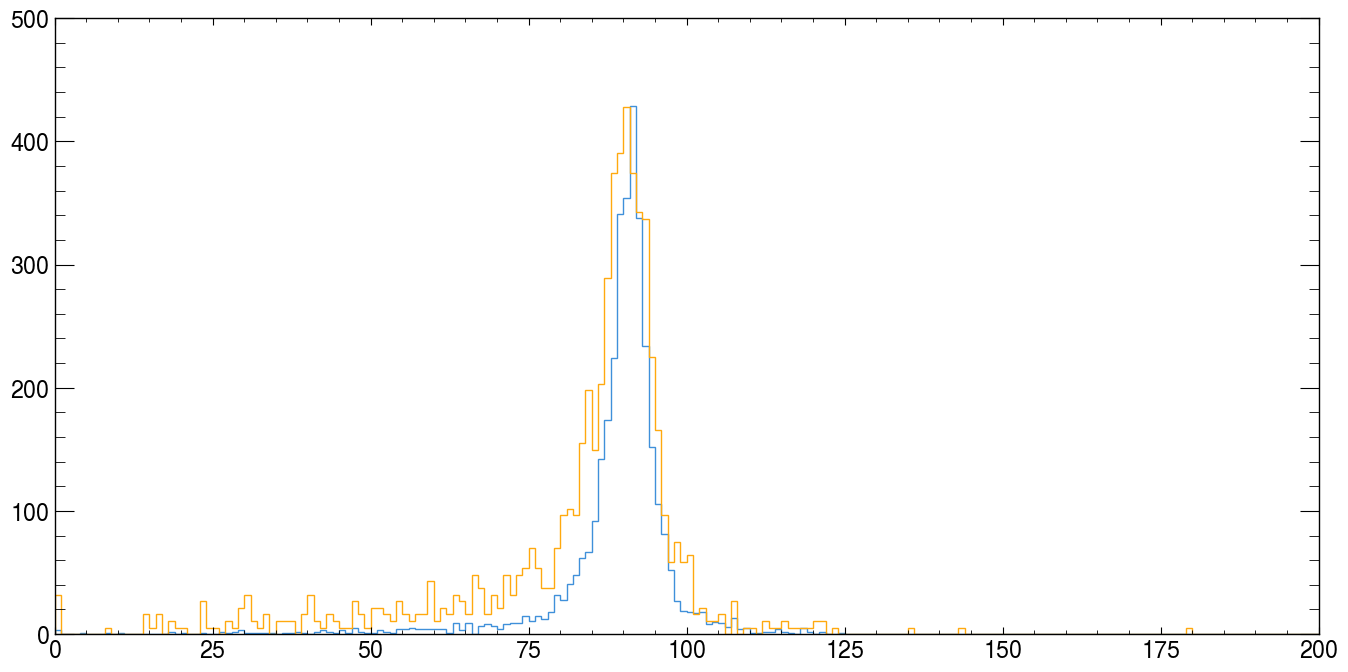

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
# ax2 = ax.twinx()
ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z")
x_hist =full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & model_prediction] 
ax.hist(x_hist, bins=200, range=(0, 200),weights=np.ones_like(x_hist)*5.35, histtype='step', label=f"ATLAS-not-Z, model-Z")
# ax.set_xlabel('m_ee [GeV]')
# ax.legend()
# print('no')

charge
eta
momentum
LH
crack
d0/sigma_d0
dz0


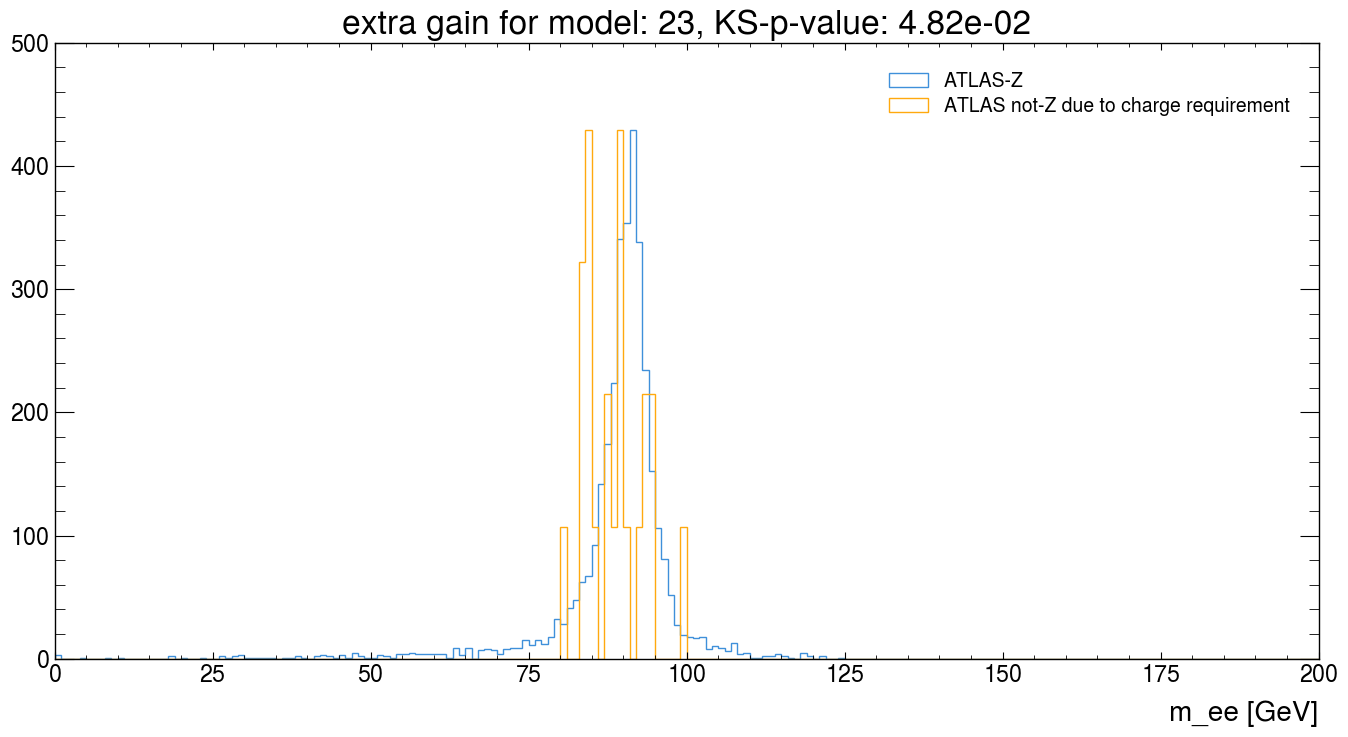

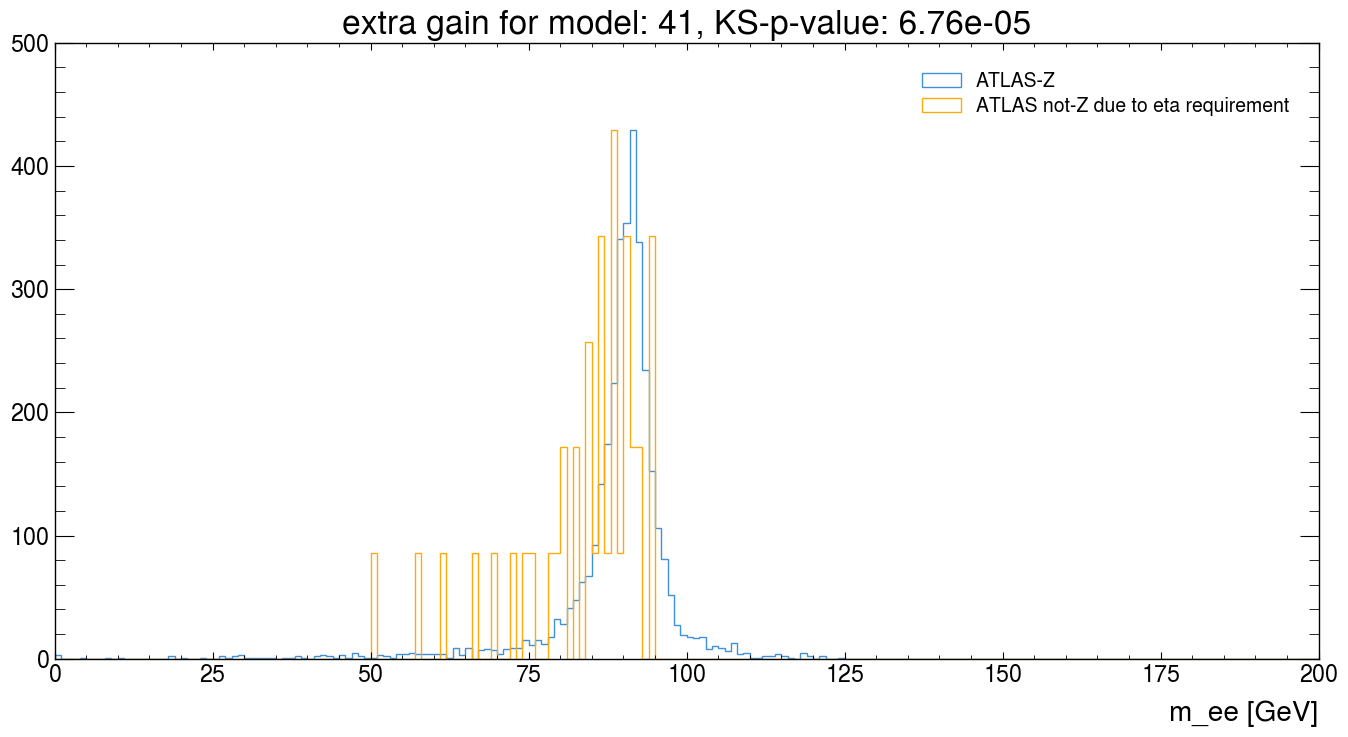

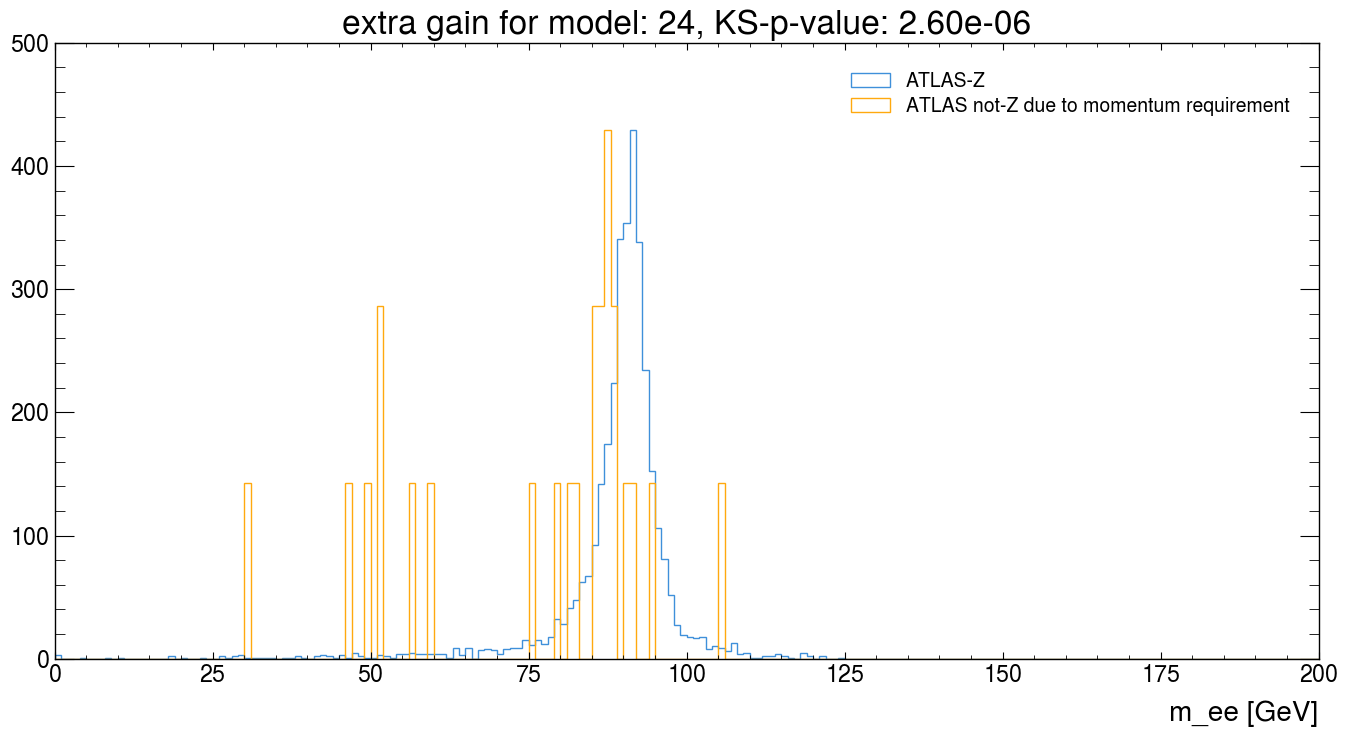

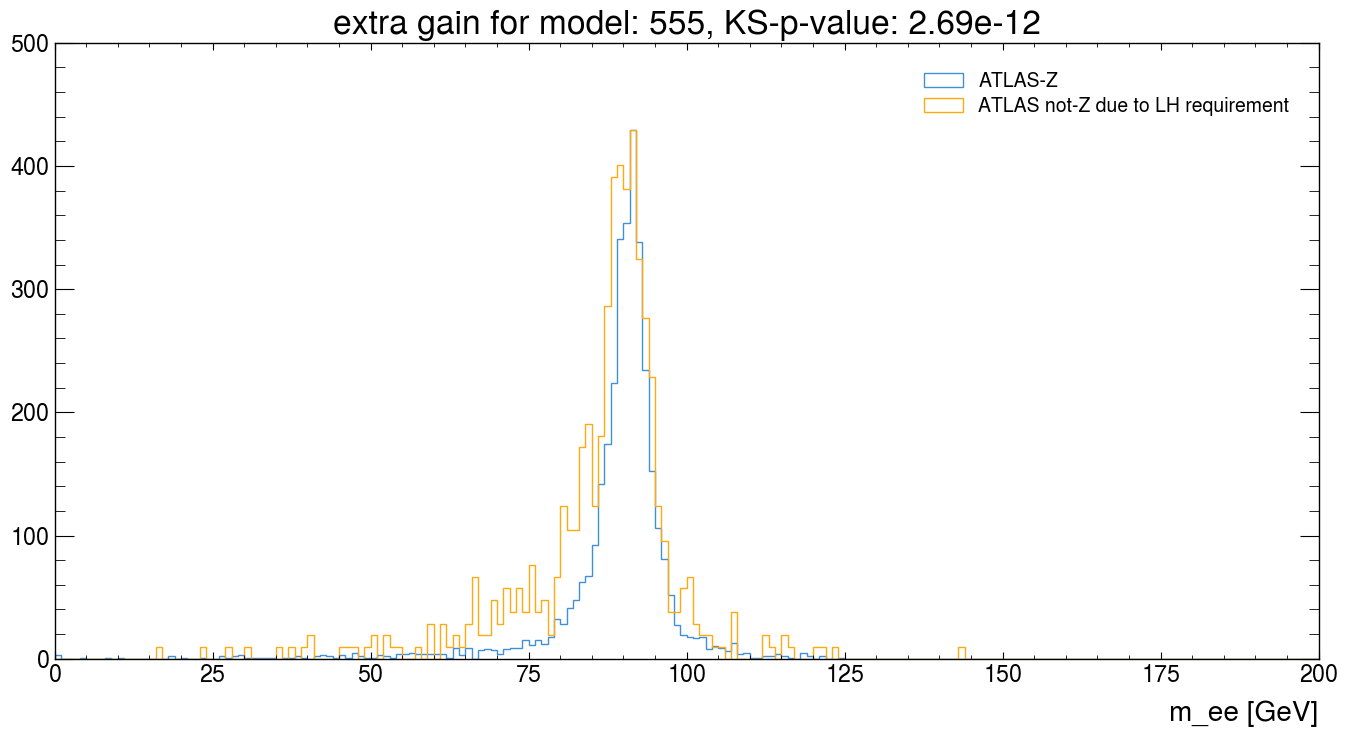

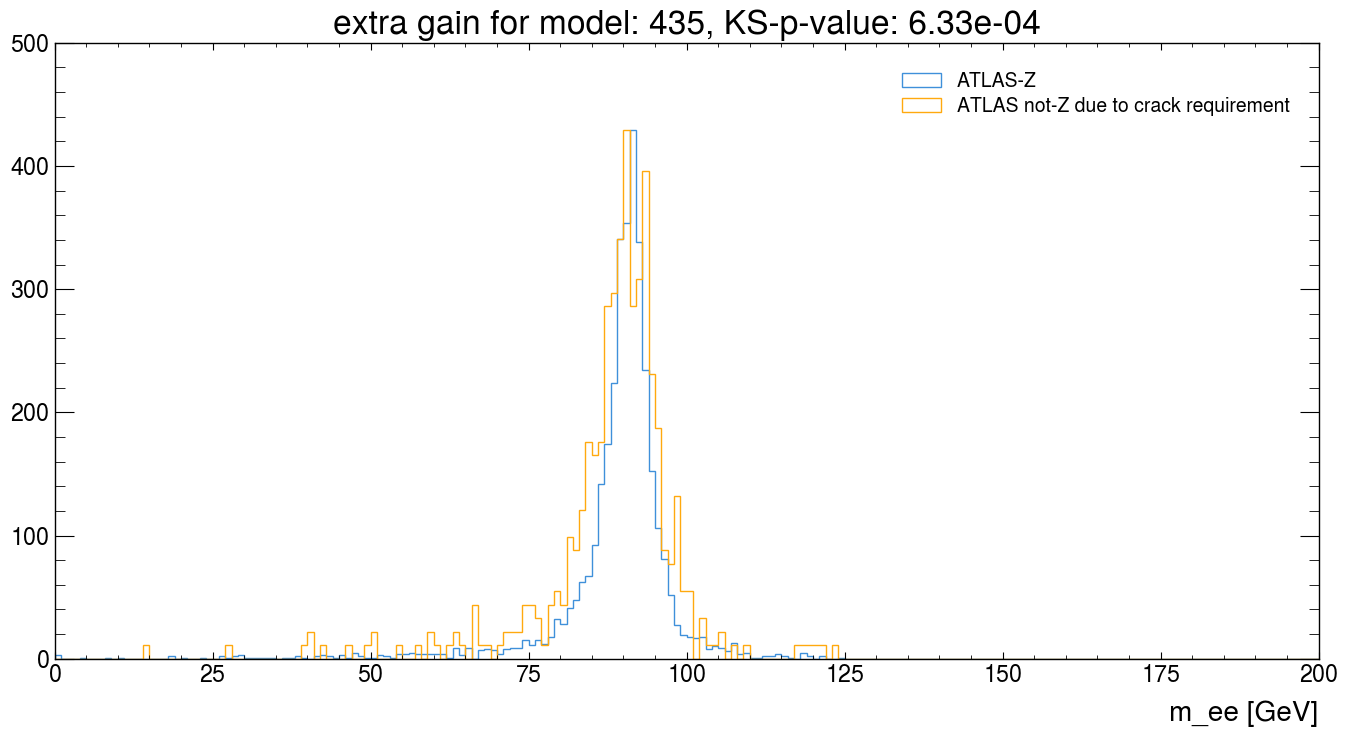

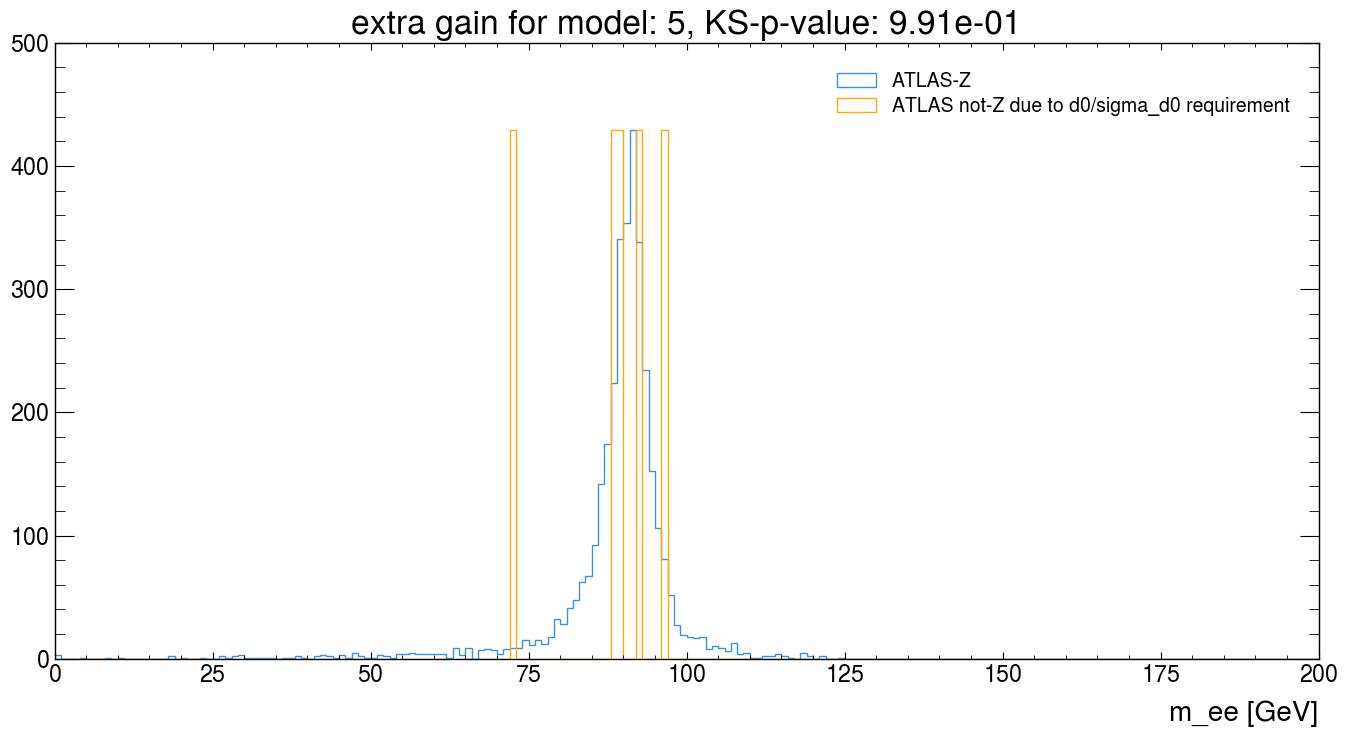

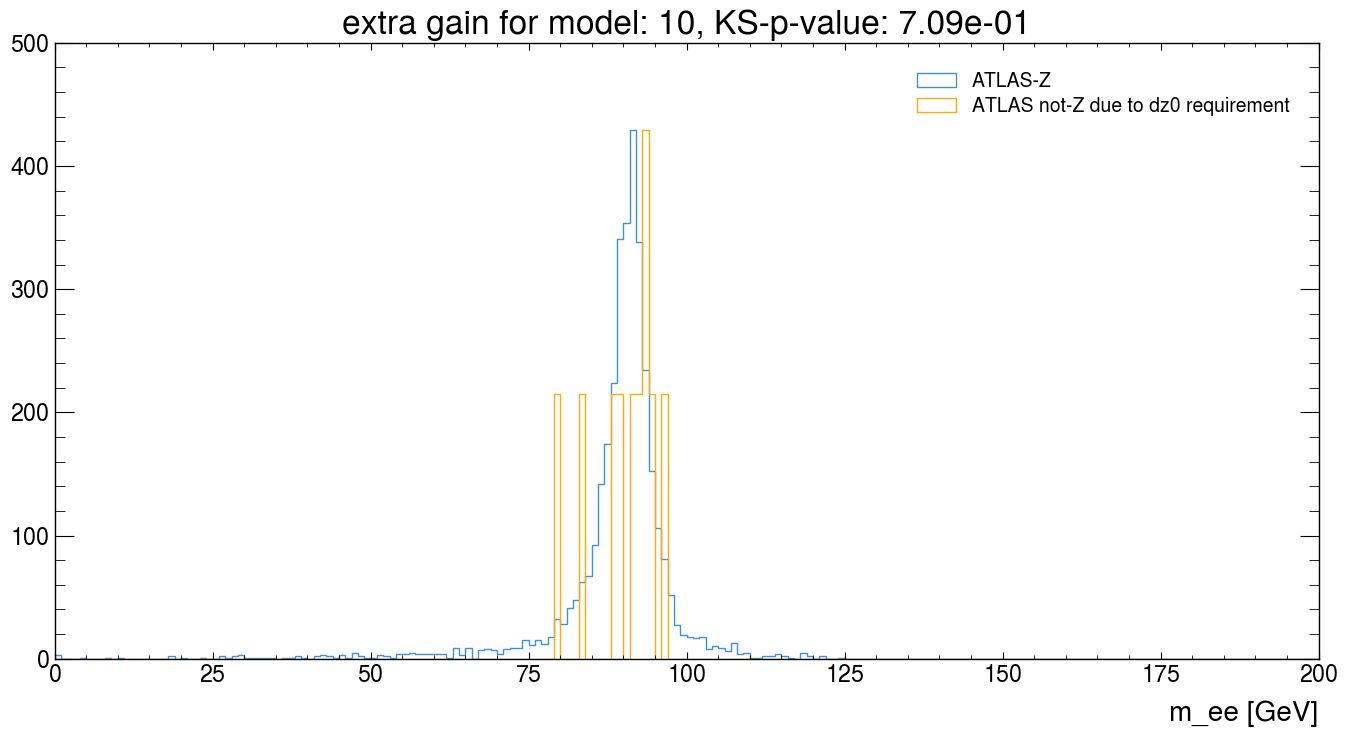

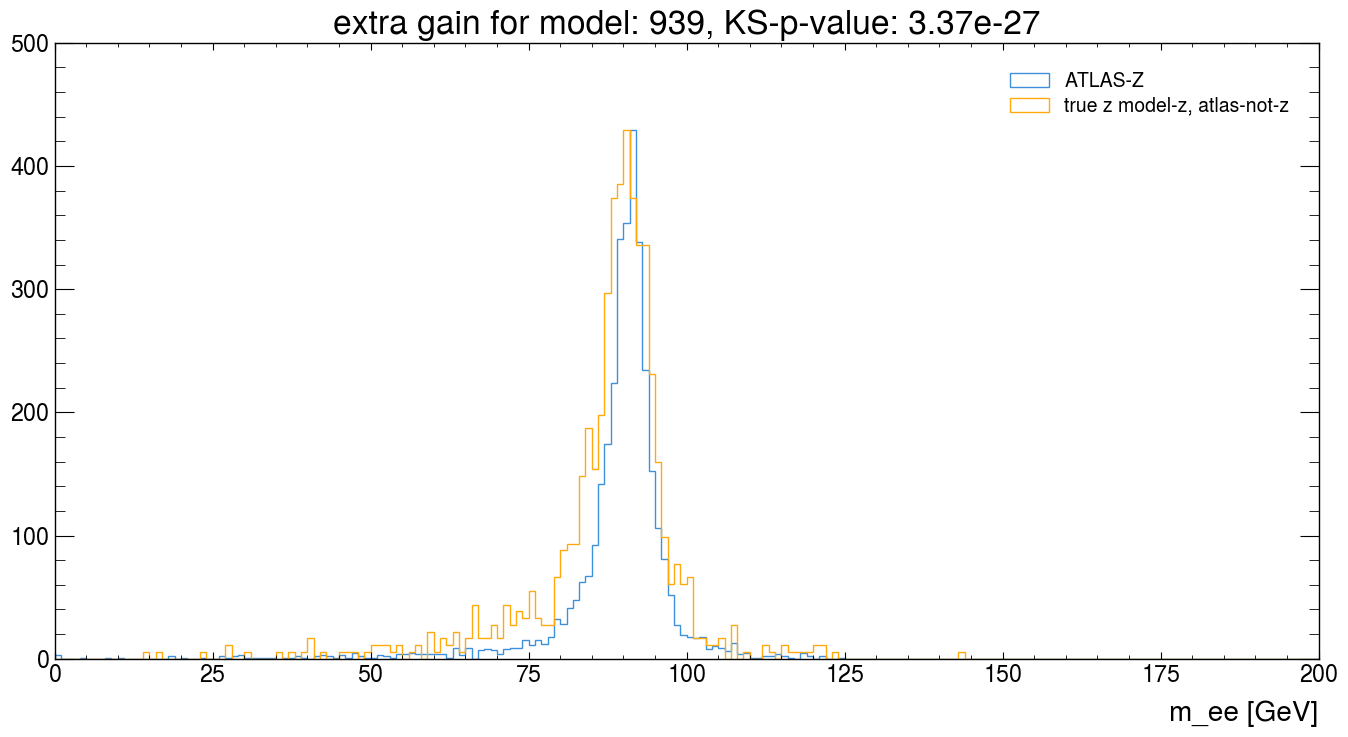

In [44]:
from scipy.stats import ks_2samp
for i in range(len(label_vector)):
    print(label_vector[i])
    fig, ax = plt.subplots(figsize=(16, 8))
    (counts_ATLAS, bins_ATLAS, _) = ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z")
    x_hist =full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & mask_matrix[i] & model_prediction]
    counts_model, bins_model = np.histogram(x_hist, bins=200, range=(0, 200))
    ax.hist(x_hist, bins=200, range=(0, 200),weights=np.ones_like(x_hist)*np.max(counts_ATLAS)/np.max(counts_model), histtype='step', label=f"ATLAS not-Z due to {label_vector[i]} requirement")
    ax.set_xlabel('m_ee [GeV]')

    # KS-test for the two distributions
    ks = ks_2samp(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & mask_matrix[i] & model_prediction])


    ax.set_title(f'extra gain for model: {np.sum(counts_model)}, KS-p-value: {ks[1]:.2e}')
    ax.legend()

fig, ax = plt.subplots(figsize=(16, 8))
(counts_ATLAS, bins_ATLAS, _) = ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z")
x_hist =full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & model_prediction & (full_val_label==1)]
counts_model, bins_model = np.histogram(x_hist, bins=200, range=(0, 200))
ax.hist(x_hist, bins=200, range=(0, 200),weights=np.ones_like(x_hist)*np.max(counts_ATLAS)/np.max(counts_model), histtype='step', label=f"true z model-z, atlas-not-z")
ax.set_xlabel('m_ee [GeV]')
ks = ks_2samp(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & model_prediction])
ax.set_title(f'extra gain for model: {np.sum(counts_model)}, KS-p-value: {ks[1]:.2e}')
ax.legend()



In [45]:
print(ks[1])

3.3696814675149085e-27


efficiency: 95.90%


/tmp/ipykernel_698989/2781708575.py:17: RuntimeWarning: invalid value encountered in divide
  eff_model = counts_trueandmodel/counts_true
/tmp/ipykernel_698989/2781708575.py:18: RuntimeWarning: invalid value encountered in divide
  eff_ATLAS = counts_trueandATLAS/counts_true


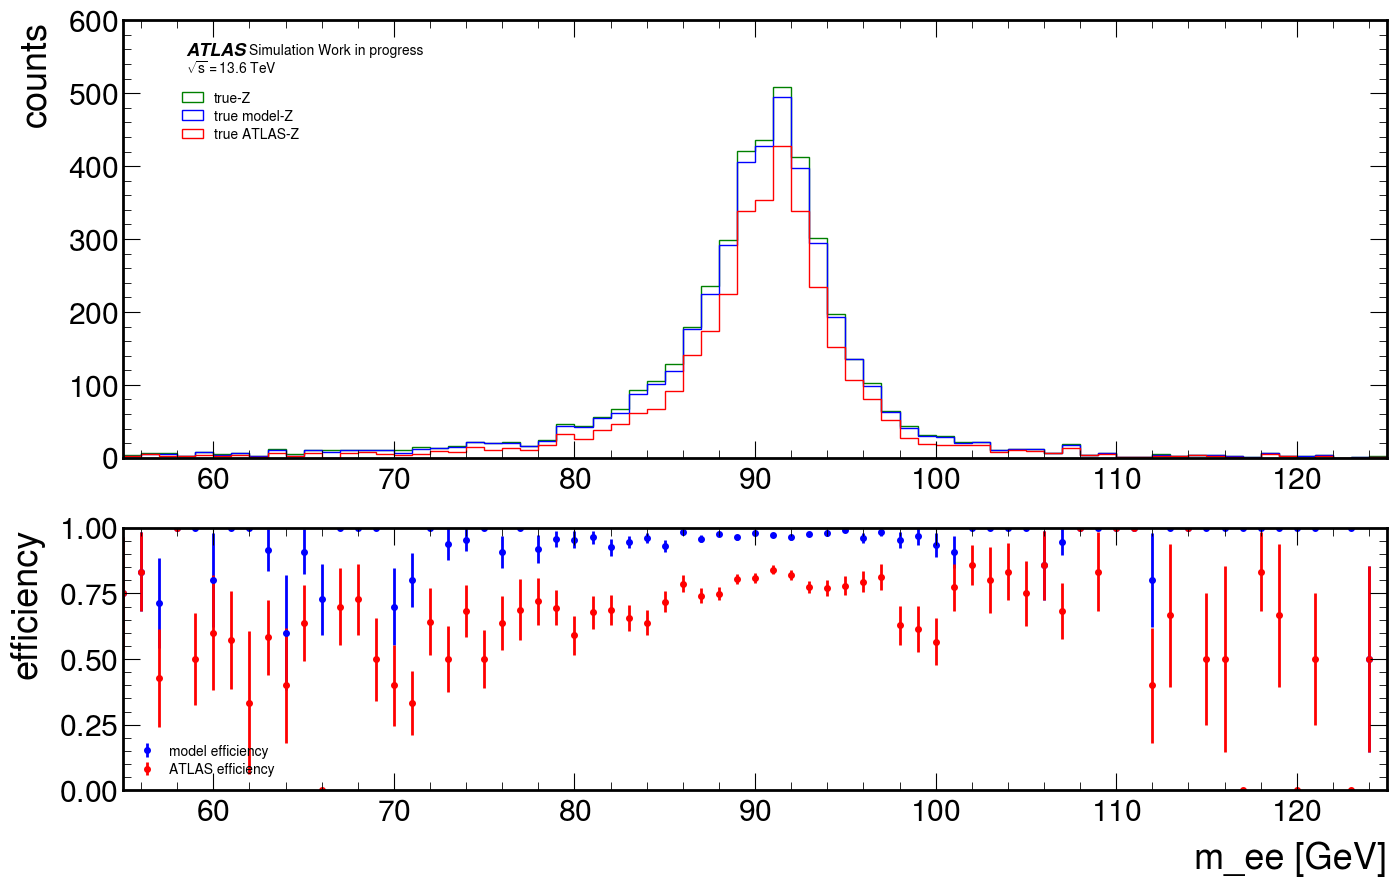

In [46]:
# efficiency is the number of signal events that are correctly identified by the model divided by the total number of signal events

efficiency = np.sum(model_prediction & full_val_label) / np.sum(full_val_label)
print(f'efficiency: {efficiency*100:.2f}%')



plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1,figsize=(16, 10), height_ratios=[3,1.8])
hep.atlas.label(data=False, label="Work in progress", fontsize=10,rlabel="$ \sqrt{s} = 13.6$ TeV", ax=ax[0])
counts_true, bins_true, _ = ax[0].hist(full_val_data['m_ee'][full_val_label==1], bins=200, range=(0, 200), histtype='step', label='true-Z', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(full_val_data['m_ee'][model_prediction & (full_val_label==1)], bins=200, range=(0, 200), histtype='step', label='true model-Z', color='blue')
counts_trueandATLAS, bins_trueandATLAS, _ = ax[0].hist(full_val_data['m_ee'][(full_val_data['ATLAS_label']==1) & (full_val_label==1)], bins=200, range=(0, 200), histtype='step', label='true ATLAS-Z', color='red')


ax[1].set_xlabel('m_ee [GeV]')
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model efficiency', color='blue')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS efficiency', color='red')

ax[0].set_xlim(90-35, 125)
ax[1].set_xlim(90-35, 125)
ax[1].set_ylim(0,1)
ax[1].set_ylabel('efficiency')
ax[0].set_ylabel('counts')
ax[0].legend(bbox_to_anchor=(0.15, 0.87), loc="upper right", prop = { "size": 10 })
ax[1].legend(prop = { "size": 10 })

In [47]:
# number of false positives for atlas:

cm = confusion_matrix(full_val_label, model_prediction)
cm2 = confusion_matrix(full_val_label, full_val_data['ATLAS_label'])

# scores

fp_ATLAS = np.sum((full_val_data['ATLAS_label']==1) & (full_val_label==0))
print(f'number of false positives for ATLAS: {fp_ATLAS}')

# cut score to achieve the same number of false positives as ATLAS
cut_score = np.sort(scores[y_test==0])[-fp_ATLAS]
print(f'cut score to achieve the same number of false positives as ATLAS: {cut_score}')


new_predictions = scores > cut_score

print(f'new number of false positives: {np.sum((new_predictions) & (y_test==0))}')

# new efficiency
new_efficiency = np.sum(new_predictions & y_test) / np.sum(y_test)
print(f'new efficiency: {new_efficiency*100:.2f}%')


number of false positives for ATLAS: 59
cut score to achieve the same number of false positives as ATLAS: 0.9316432459802748
new number of false positives: 58
new efficiency: 86.97%


efficiency: 86.97%


/tmp/ipykernel_698989/1507811498.py:17: RuntimeWarning: invalid value encountered in divide
  eff_model = counts_trueandmodel/counts_true
/tmp/ipykernel_698989/1507811498.py:18: RuntimeWarning: invalid value encountered in divide
  eff_ATLAS = counts_trueandATLAS/counts_true


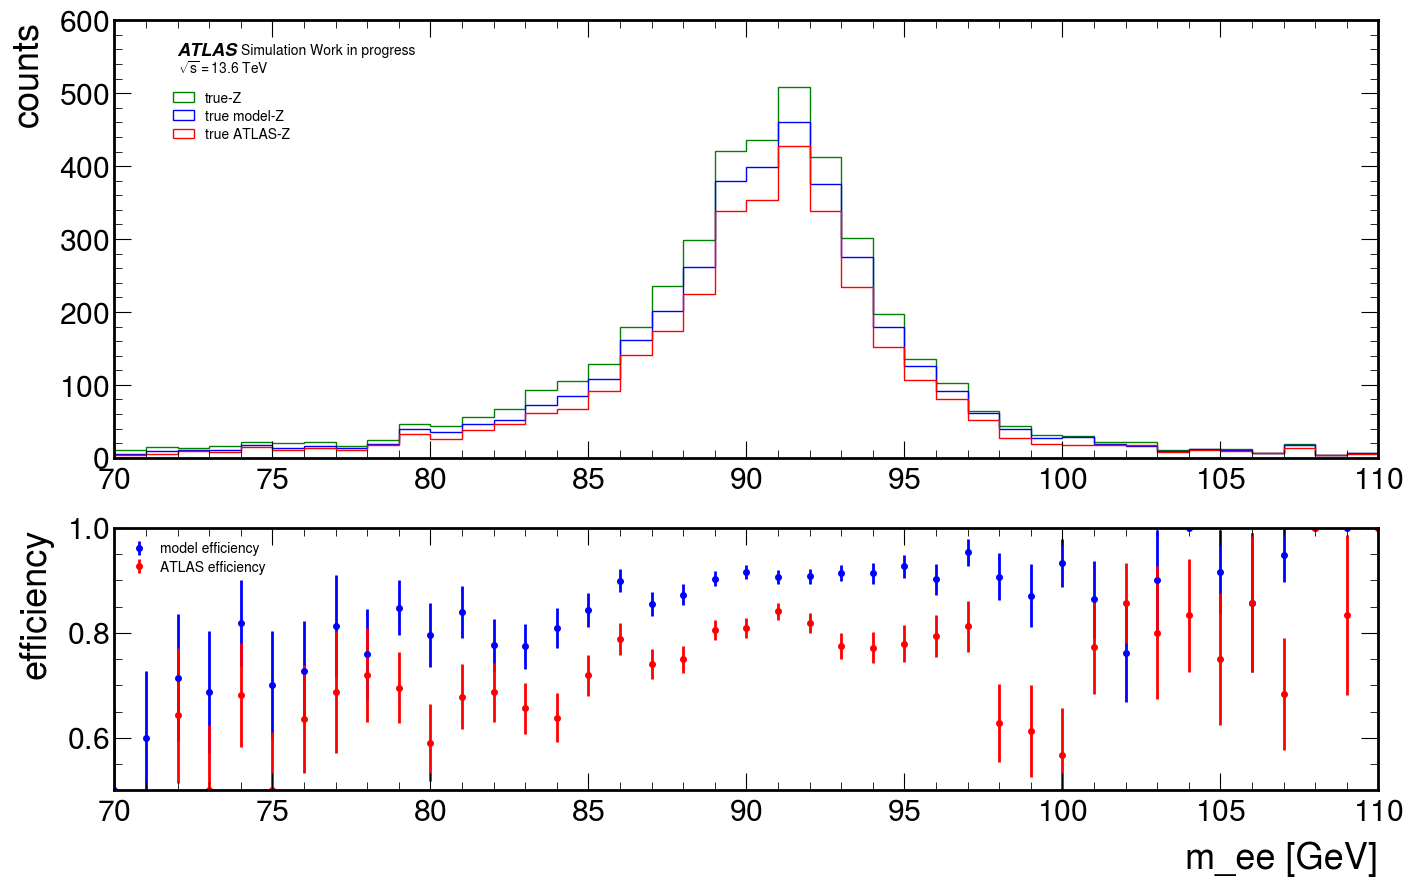

In [48]:
# efficiency is the number of signal events that are correctly identified by the model divided by the total number of signal events

efficiency = np.sum(new_predictions & full_val_label) / np.sum(full_val_label)
print(f'efficiency: {efficiency*100:.2f}%')



plt.style.use([hep.style.ROOT, hep.style.firamath])
fig, ax = plt.subplots(2,1,figsize=(16, 10), height_ratios=[3,1.8])
hep.atlas.label(data=False, label="Work in progress", fontsize=10,rlabel="$ \sqrt{s} = 13.6$ TeV", ax=ax[0])
counts_true, bins_true, _ = ax[0].hist(full_val_data['m_ee'][full_val_label==1], bins=200, range=(0, 200), histtype='step', label='true-Z', color='green')
counts_trueandmodel, bins_trueandmodel, _ = ax[0].hist(full_val_data['m_ee'][new_predictions & (full_val_label==1)], bins=200, range=(0, 200), histtype='step', label='true model-Z', color='blue')
counts_trueandATLAS, bins_trueandATLAS, _ = ax[0].hist(full_val_data['m_ee'][(full_val_data['ATLAS_label']==1) & (full_val_label==1)], bins=200, range=(0, 200), histtype='step', label='true ATLAS-Z', color='red')


ax[1].set_xlabel('m_ee [GeV]')
eff_model = counts_trueandmodel/counts_true
eff_ATLAS = counts_trueandATLAS/counts_true

uncertainty_model = np.sqrt(eff_model*(1-eff_model)/counts_true)
uncertainty_ATLAS = np.sqrt(eff_ATLAS*(1-eff_ATLAS)/counts_true)

ax[1].errorbar(bins_true[:-1], eff_model, yerr=uncertainty_model, fmt='.', label='model efficiency', color='blue')
ax[1].errorbar(bins_true[:-1], eff_ATLAS, yerr=uncertainty_ATLAS, fmt='.', label='ATLAS efficiency', color='red')

ax[0].set_xlim(70, 110)
ax[1].set_xlim(70, 110)
ax[1].set_ylim(0.5,1)
ax[1].set_ylabel('efficiency')
ax[0].set_ylabel('counts')
ax[0].legend(bbox_to_anchor=(0.15, 0.87), loc="upper right", prop = { "size": 10 })
ax[1].legend(prop = { "size": 10 })

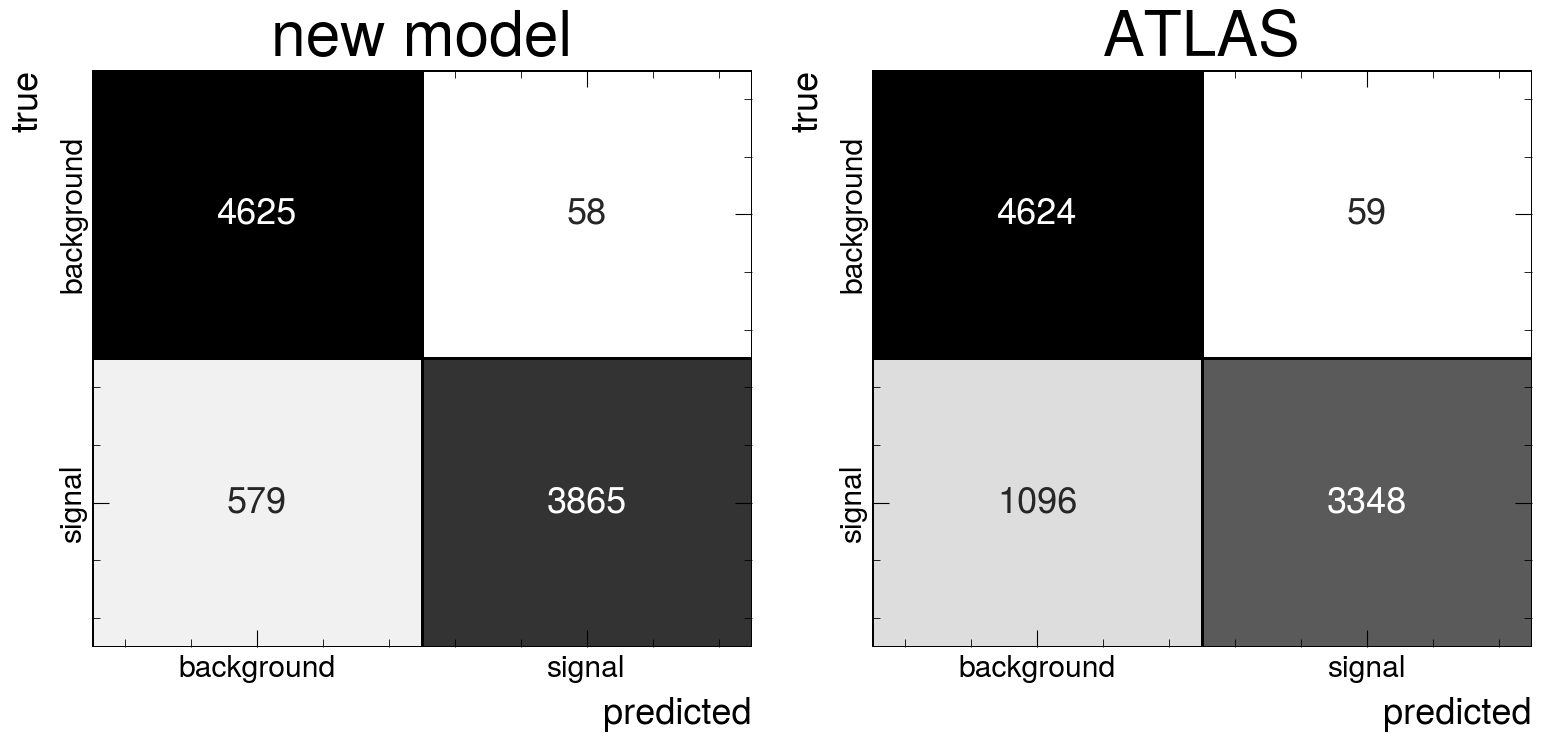

In [49]:
# new confusion matrix
cm_new = confusion_matrix(full_val_label, new_predictions)

fig, ax = plt.subplots(1,2,figsize=(16, 8))
sns.heatmap(cm_new, annot=True, ax=ax[0], cbar=False, cmap='Greys',
            linewidths=1, linecolor='black', fmt='.0f')
ax[0].set_xticklabels(['background', 'signal'])
ax[0].set_yticklabels(['background', 'signal'])
ax[0].set_xlabel('predicted')
ax[0].set_ylabel('true')
sns.heatmap(cm2, annot=True, ax=ax[1], cbar=False, cmap='Greys',
            linewidths=1, linecolor='black', fmt='.0f')
ax[1].set_xticklabels(['background', 'signal'])
ax[1].set_yticklabels(['background', 'signal'])
ax[1].set_xlabel('predicted')
ax[1].set_ylabel('true')

ax[0].set_title('new model')
ax[1].set_title('ATLAS')
fig.tight_layout()


charge
eta
momentum
LH
crack
d0/sigma_d0
dz0


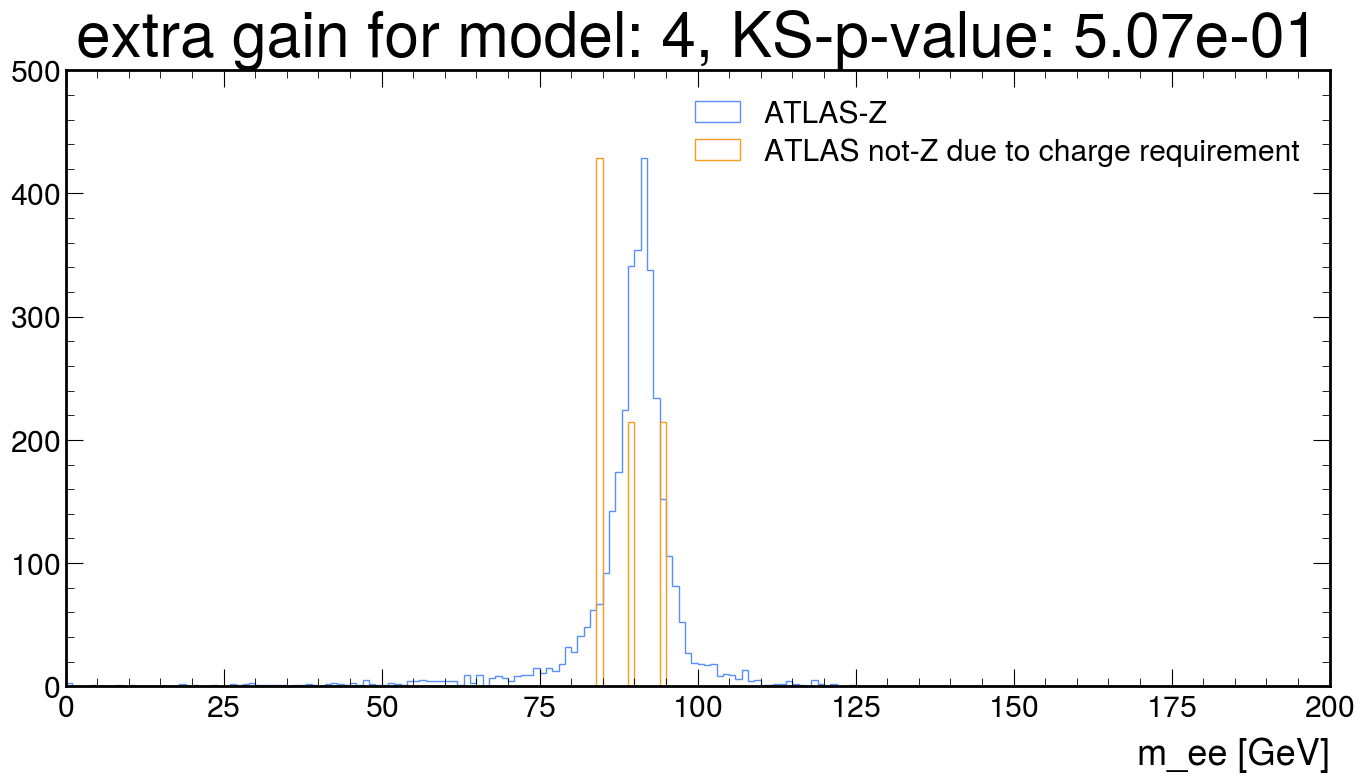

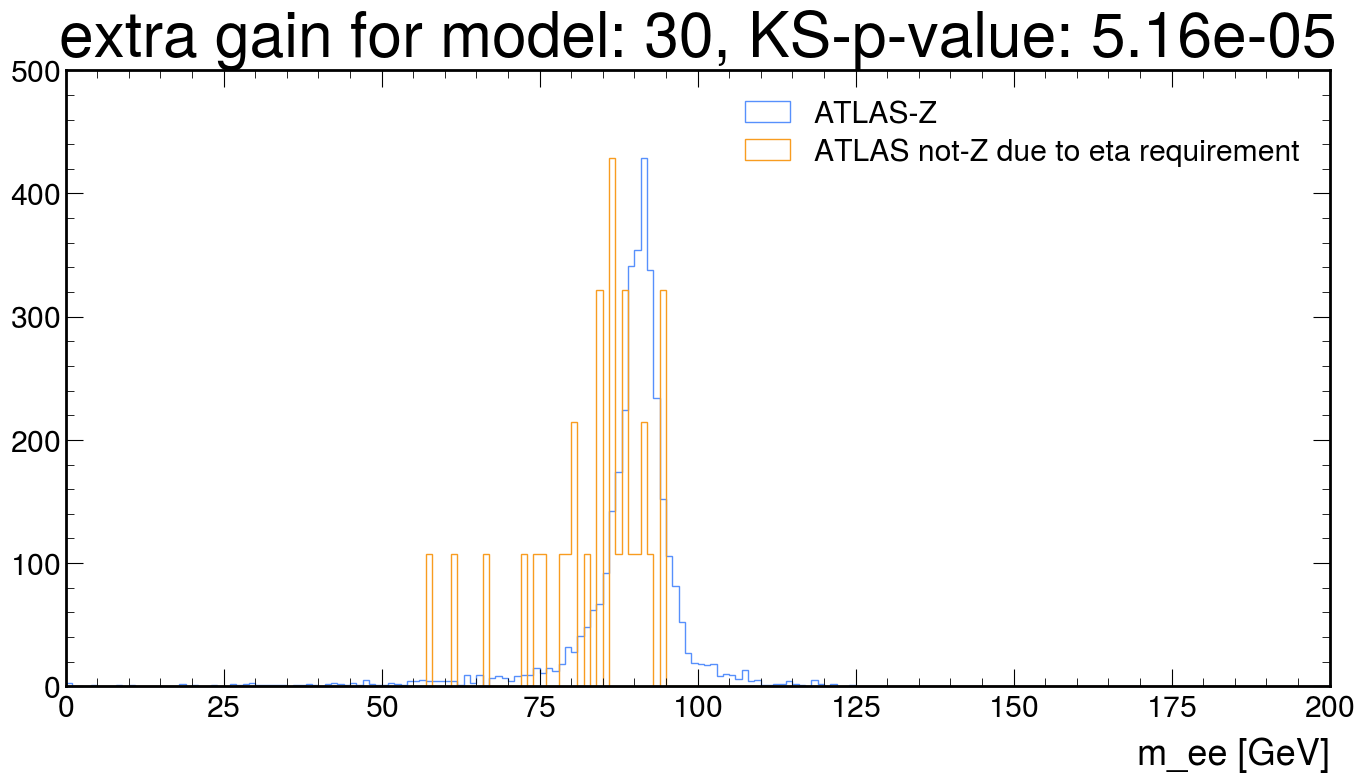

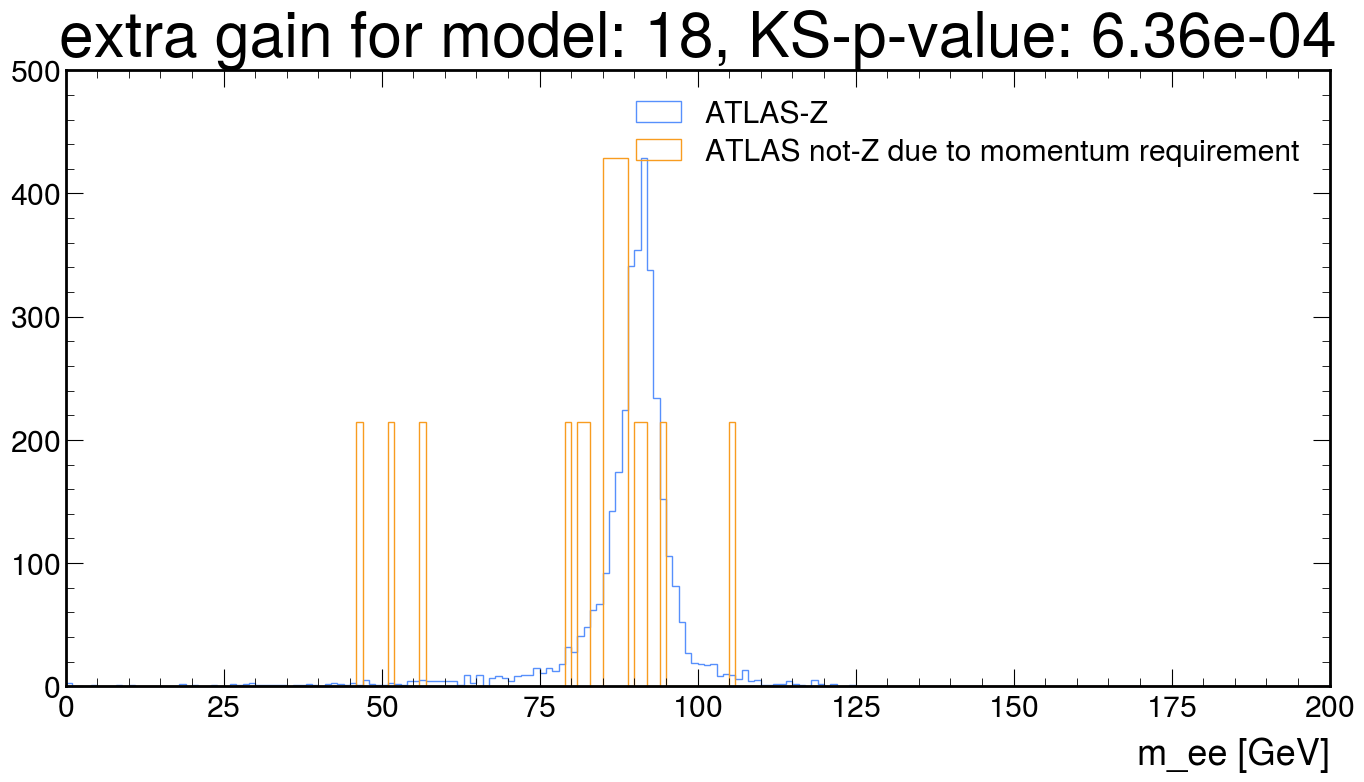

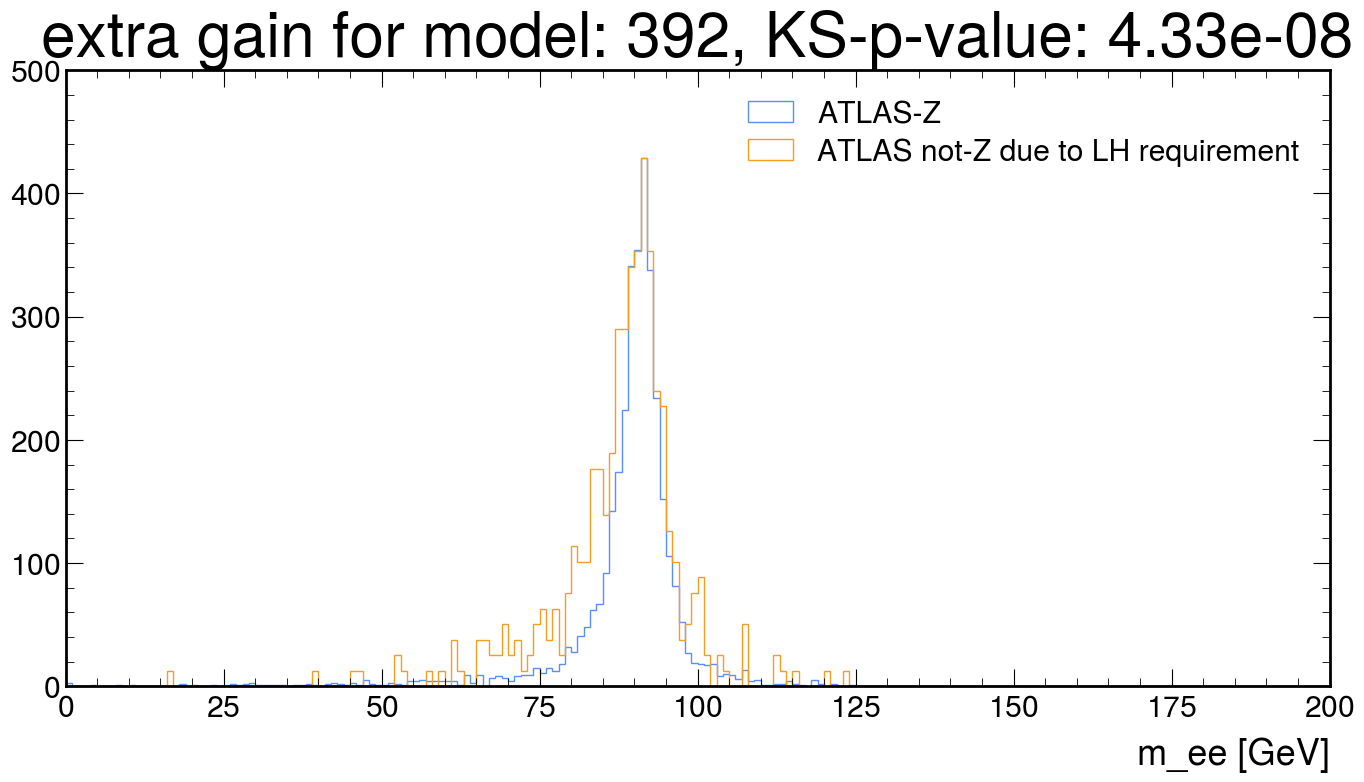

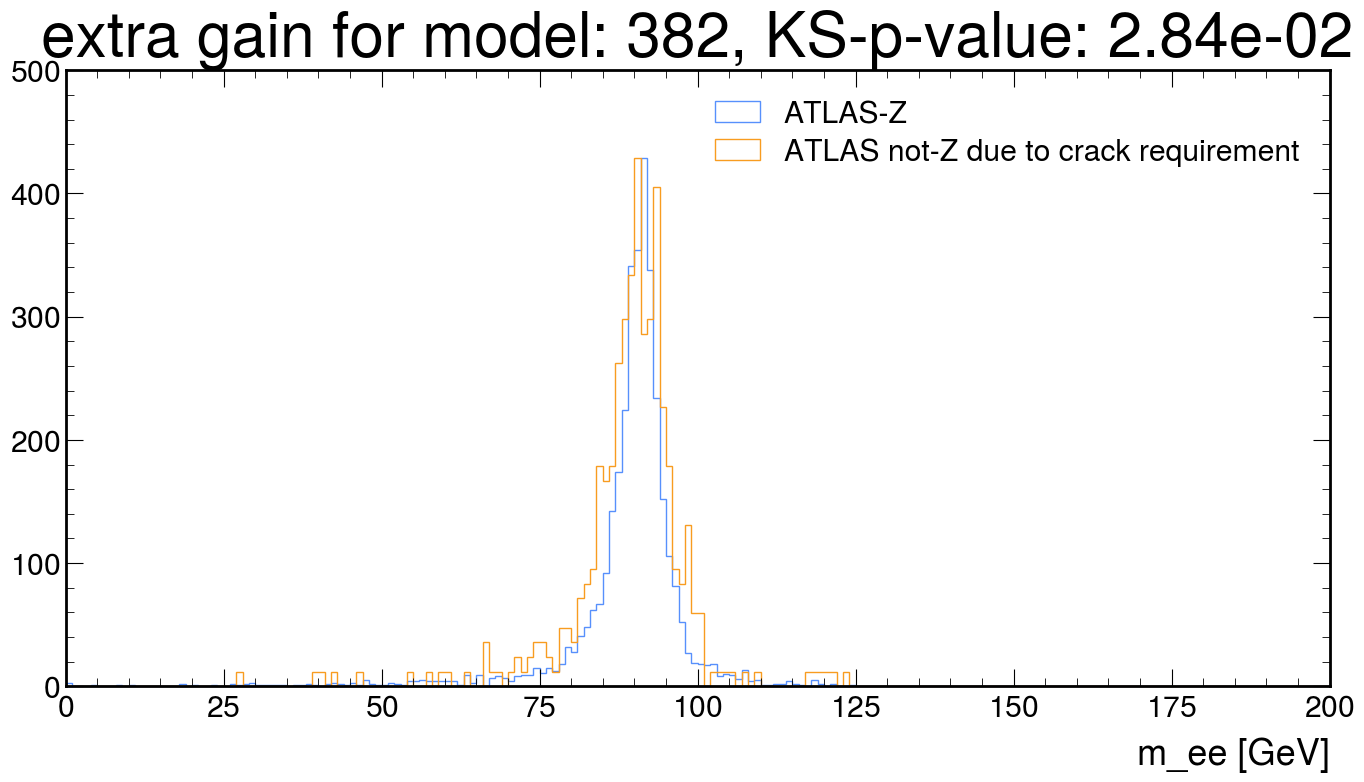

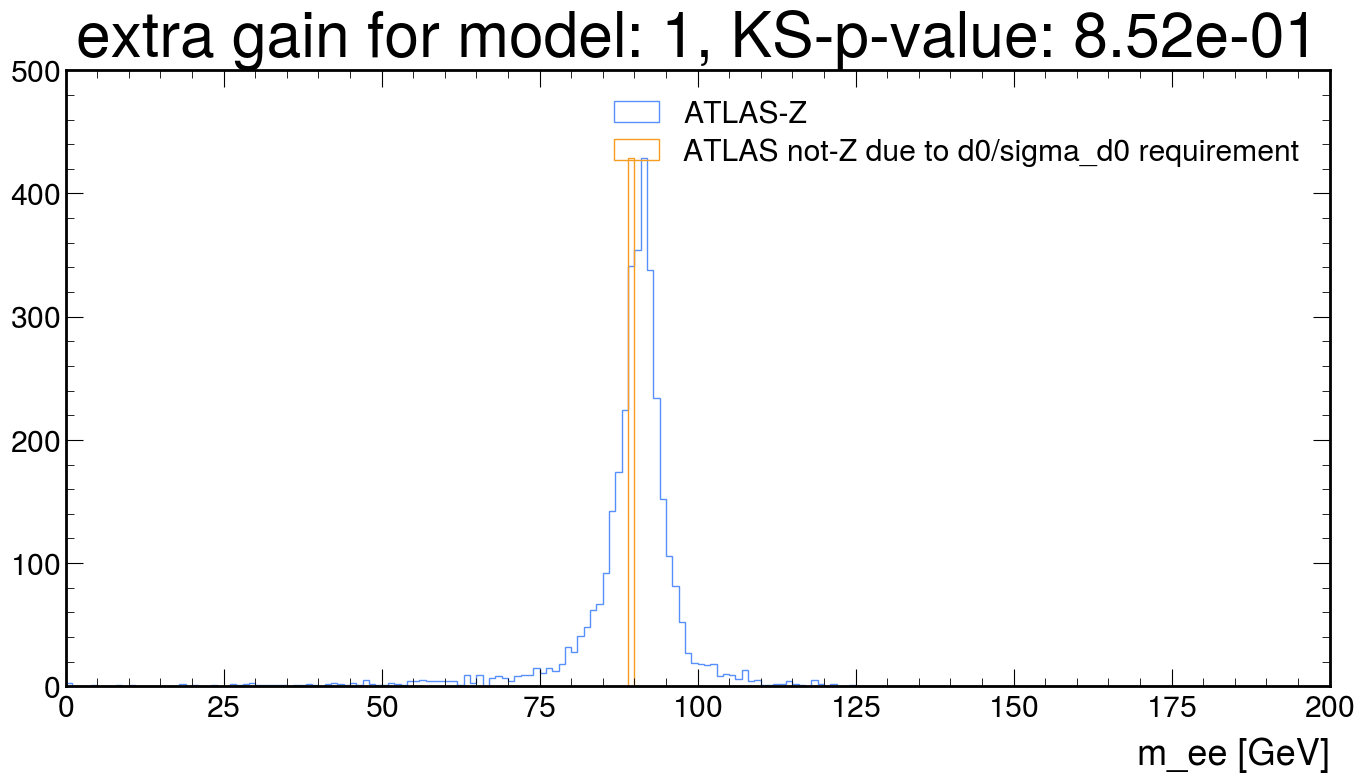

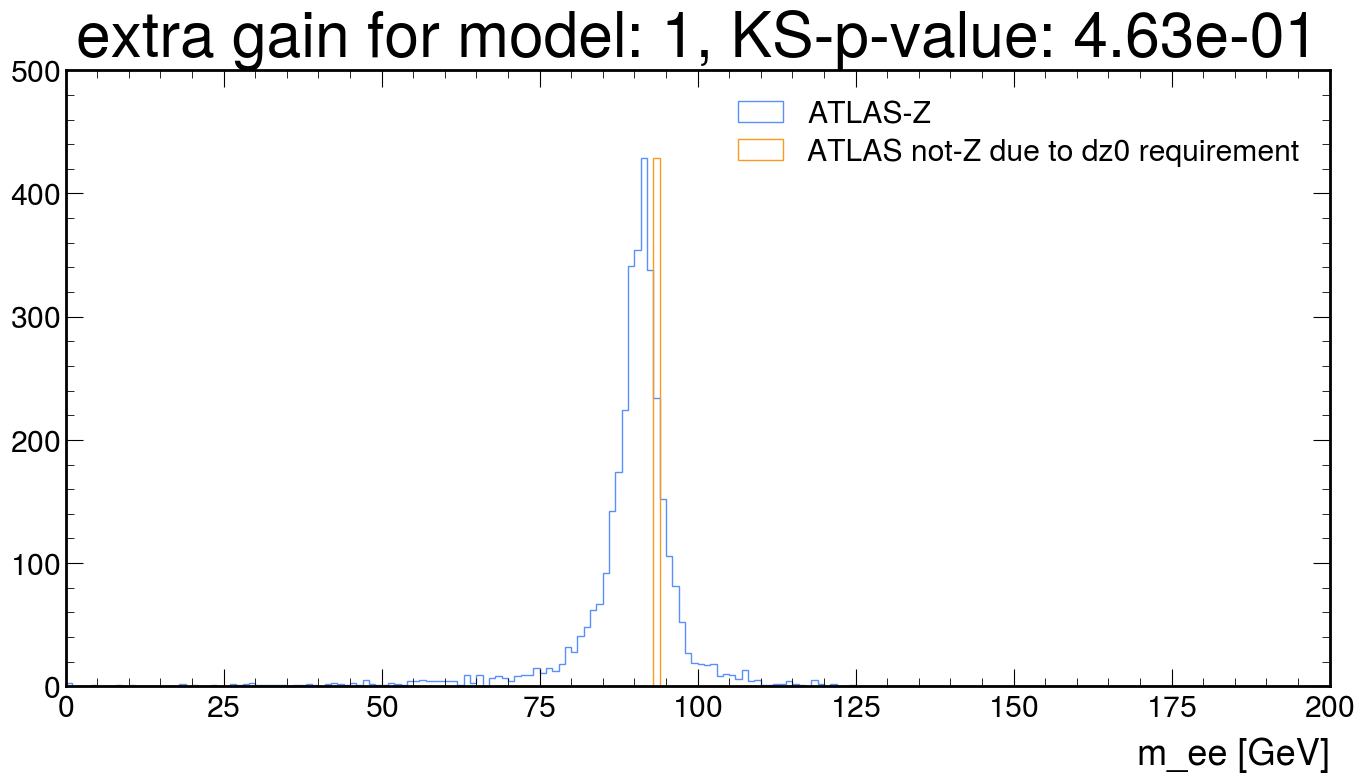

In [50]:
from scipy.stats import ks_2samp
for i in range(len(label_vector)):
    print(label_vector[i])
    fig, ax = plt.subplots(figsize=(16, 8))
    (counts_ATLAS, bins_ATLAS, _) = ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z")
    x_hist =full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & mask_matrix[i] & new_predictions]
    counts_model, bins_model = np.histogram(x_hist, bins=200, range=(0, 200))
    ax.hist(x_hist, bins=200, range=(0, 200),weights=np.ones_like(x_hist)*np.max(counts_ATLAS)/np.max(counts_model), histtype='step', label=f"ATLAS not-Z due to {label_vector[i]} requirement")
    ax.set_xlabel('m_ee [GeV]')

    # KS-test for the two distributions
    ks = ks_2samp(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & mask_matrix[i] & new_predictions])


    ax.set_title(f'extra gain for model: {np.sum(counts_model)}, KS-p-value: {ks[1]:.2e}')
    ax.legend()




(70.0, 110.0)

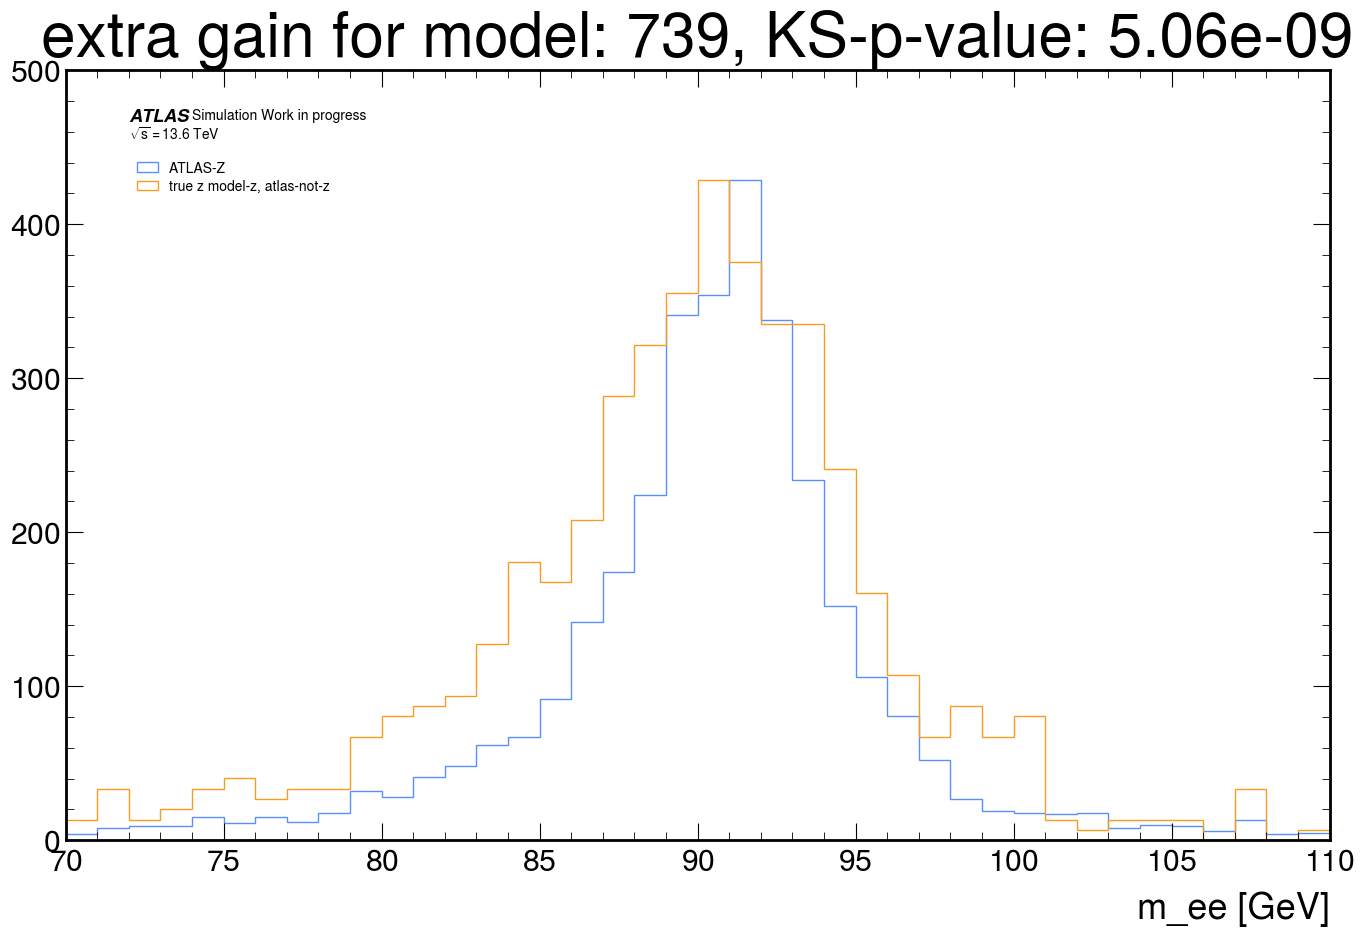

In [51]:
fig, ax = plt.subplots(figsize=(16, 10))
(counts_ATLAS, bins_ATLAS, _) = ax.hist(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], bins=200, range=(0, 200), histtype='step', label=f"ATLAS-Z")
x_hist =full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & new_predictions & (full_val_label==1)]
counts_model, bins_model = np.histogram(x_hist, bins=200, range=(0, 200))
ax.hist(x_hist, bins=200, range=(0, 200),weights=np.ones_like(x_hist)*np.max(counts_ATLAS)/np.max(counts_model), histtype='step', label=f"true z model-z, atlas-not-z")
ax.set_xlabel('m_ee [GeV]')
ks = ks_2samp(full_val_data['m_ee'][full_val_data['ATLAS_label']==1], full_val_data['m_ee'][(full_val_data['ATLAS_label']==0) & new_predictions])
ax.set_title(f'extra gain for model: {np.sum(counts_model)}, KS-p-value: {ks[1]:.2e}')
hep.atlas.label(data=False, label="Work in progress", fontsize=10,rlabel="$ \sqrt{s} = 13.6$ TeV", ax=ax)
ax.legend(bbox_to_anchor=(0.22, 0.9), loc="upper right", prop = { "size": 10 })
ax.set_xlim(70, 110)



In [56]:
drop_list = ['isZ', 'm_ee', 'event_index', 'runNumber', 'eventNumber', 'el1_pt', 'el2_pt'
             , 'el1_truthPdgId', 'el2_truthPdgId', 'el1_truthOrigin', 'el2_truthOrigin', 'el1_truthType', 'el2_truthType',
             'el1_GSFTrack_qOverP', 'el2_GSFTrack_qOverP', 'el1_GSF_Track_Var0', 'el2_GSF_Track_Var0', 'el1_GSF_Track_Var1', 'el2_GSF_Track_Var1',
             'el1_GSF_Track_Var2', 'el2_GSF_Track_Var2', 'el1_GSF_Track_Var4', 'el2_GSF_Track_Var4',
             'el1_GSFTrack_theta', 'el2_GSFTrack_theta', 'el1_GSFTrack_phi', 'el2_GSFTrack_phi', 'el1_phi', 'el2_phi'
             , 'el1_DFCommonElectrons_LHLoose', 'el2_DFCommonElectrons_LHLoose',
             'el1_GSFTrack_z0', 'el2_GSFTrack_z0', 'el1_GSF_Track_Var3', 'el2_GSF_Track_Var3', 'ATLAS_label', 'el1_GSF_dR', 'el2_GSF_dR',
             'el1_GSFTrack_d0', 'el1_GSFTrack_d0']

In [55]:
Zee_data = pd.read_parquet('~/H_Zg/samples_processed/MC23/Zee_deriv_epairs_all_events_cut_and_predicted.parquet')
print(Zee_data.columns)

Index(['event_index', 'el1_index', 'el2_index', 'runNumber', 'eventNumber',
       'actualInteractionsPerCrossing', 'averageInteractionsPerCrossing',
       'm_ee', 'isZ', 'el1_pt', 'el1_eta', 'el1_phi', 'el1_m', 'el1_charge',
       'el1_ptvarcone20', 'el1_topoetcone20', 'el1_topoetcone40', 'el1_f1',
       'el1_neflowisol20', 'el1_truthPdgId', 'el1_truthType',
       'el1_truthOrigin', 'el1_DFCommonElectronsECIDS',
       'el1_DFCommonElectronsECIDSResult', 'el1_DFCommonElectrons_pel',
       'el1_DFCommonElectrons_LHLoose', 'el1_GSFTrack_d0', 'el1_GSFTrack_z0',
       'el1_GSFTrack_theta', 'el1_GSFTrack_phi', 'el1_GSFTrack_qOverP',
       'el1_GSF_dR', 'el1_GSF_Track_Var0', 'el1_GSF_Track_Var1',
       'el1_GSF_Track_Var2', 'el1_GSF_Track_Var3', 'el1_GSF_Track_Var4',
       'el2_pt', 'el2_eta', 'el2_phi', 'el2_m', 'el2_charge',
       'el2_ptvarcone20', 'el2_topoetcone20', 'el2_topoetcone40', 'el2_f1',
       'el2_neflowisol20', 'el2_truthPdgId', 'el2_truthType',
       'el2_truthOr

In [58]:
# implement ATLAS cuts
Zee_data = Zee_data[(Zee_data['el1_pt'] > 9000) & (Zee_data['el2_pt'] > 9000)]

ATLAS_Energy = (Zee_data['el1_pt'] > 10000) & (Zee_data['el2_pt'] > 10000)
ATLAS_Eta = (np.abs(Zee_data['el1_eta']) < 2.47) & (np.abs(Zee_data['el2_eta']) < 2.47)
ATLAS_Crack = (np.abs(Zee_data['el1_eta']) > 1.37) & (np.abs(Zee_data['el1_eta']) < 1.52) | (np.abs(sample['el2_eta']) > 1.37) & (np.abs(sample['el2_eta']) < 1.52)

ATLAS_d0sigd0 = ( (np.abs(Zee_data['el1_GSFTrack_d0'])/np.sqrt(Zee_data['el1_GSF_Track_Var1']) ) < 5) & \
                ( (np.abs(Zee_data['el2_GSFTrack_d0'])/np.sqrt(Zee_data['el2_GSF_Track_Var1']) ) < 5)

dz = np.abs(Zee_data['el1_GSFTrack_z0'] - Zee_data['el2_GSFTrack_z0'])
sigma_dz = np.sqrt(Zee_data['el1_GSF_Track_Var0'] + Zee_data['el2_GSF_Track_Var0'])

dz_sintheta1 = (dz * Zee_data['el1_GSFTrack_theta']) < 0.5 * np.sqrt(2)
dz_sintheta2 = (dz * Zee_data['el2_GSFTrack_theta']) < 0.5 * np.sqrt(2)

ATLAS_dz = dz_sintheta1 & dz_sintheta2

ATLAS_charge = Zee_data['el1_charge'] != Zee_data['el2_charge']

ATLAS_label = ATLAS_Eta & ~ATLAS_Crack & ATLAS_d0sigd0 & ATLAS_dz &\
      Zee_data['el1_DFCommonElectrons_LHLoose'] & Zee_data['el2_DFCommonElectrons_LHLoose'] &\
      ATLAS_charge & ATLAS_Energy


pred_Zee_data = model.predict_proba(Zee_data.drop(columns=drop_list, axis=1))[:,1]

Zee_data['ATLAS_label'] = ATLAS_label
Zee_data['ATLAS_Energy'] = ATLAS_Energy
Zee_data['ATLAS_charge'] = ATLAS_charge
Zee_data['ATLAS_Eta'] = ATLAS_Eta
Zee_data['ATLAS_Crack'] = ~ATLAS_Crack
Zee_data['ATLAS_d0sigd0'] = ATLAS_d0sigd0
Zee_data['ATLAS_dzsintheta'] = ATLAS_dz


prediction_Zee_data = pred_Zee_data > cut_score

Zee_data['prediction'] = prediction_Zee_data
Zee_data['score'] = pred_Zee_data

/tmp/ipykernel_698989/2375358709.py:21: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  ATLAS_label = ATLAS_Eta & ~ATLAS_Crack & ATLAS_d0sigd0 & ATLAS_dz &\
/tmp/ipykernel_698989/2375358709.py:21: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  ATLAS_label = ATLAS_Eta & ~ATLAS_Crack & ATLAS_d0sigd0 & ATLAS_dz &\


ValueError: Number of features of the model must match the input. Model n_features_ is 27 and input n_features is 35

In [2]:
f = (1,2,3,5,1,2,2,2,2,2,2)
print(f)
print(type(f))

(1, 2, 3, 5, 1, 2, 2, 2, 2, 2, 2)
<class 'tuple'>
